In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image 
import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [2]:
#using the seaborn style for graphs
plt.style.use("seaborn")

<ipython-input-2-3b8bf50b59b2>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
employee_data = pd.read_csv("Attrition.csv")
employee_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
##looking for any missing values

employee_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
employee_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#Mapping the attrition 1 - yes and 0 - no in the new column

employee_data["left"] = np.where(employee_data["Attrition"] == "Yes",1,0)

In [9]:
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [10]:
#supressing all the warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    """A function for plotting the distribution of numerical variables and its effect on attrition"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

In [12]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "left"):
    
    """A function for Plotting the effect of variables(categorical data) on attrition """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

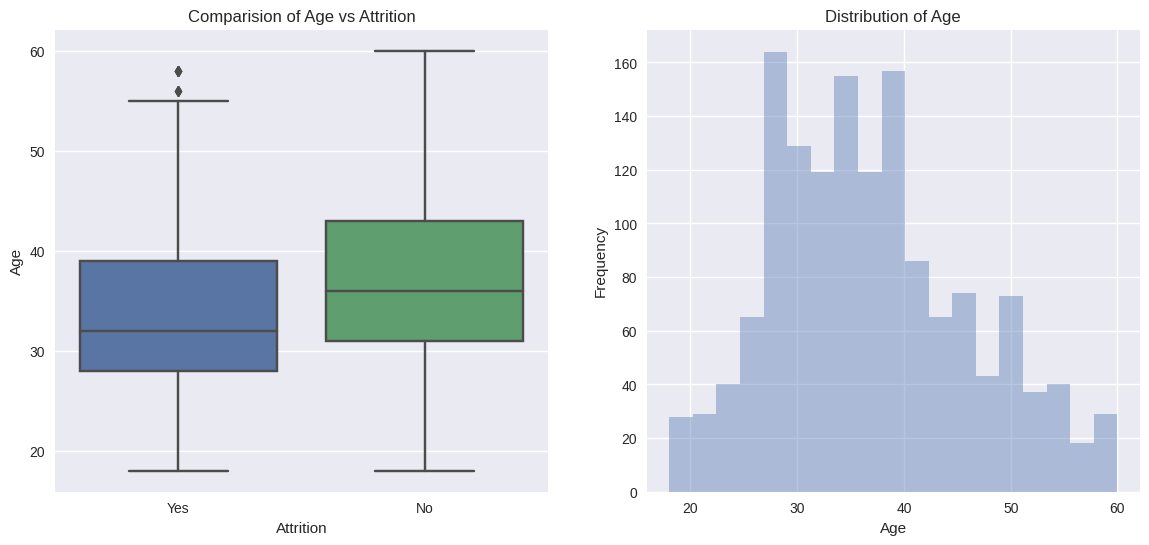

In [13]:
# we are checking the distribution of employee age and its related to attrition or not
NumericalVariables_targetPlots(employee_data,segment_by="Age")

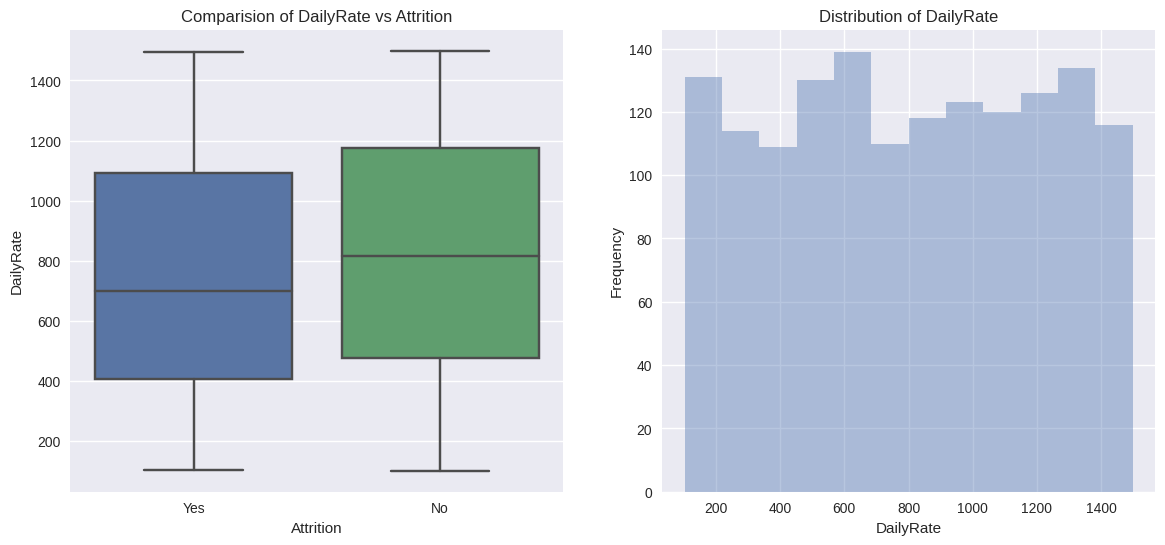

In [14]:
#Analyzing the daily wage rate vs employee left the company or not
NumericalVariables_targetPlots(employee_data,"DailyRate")

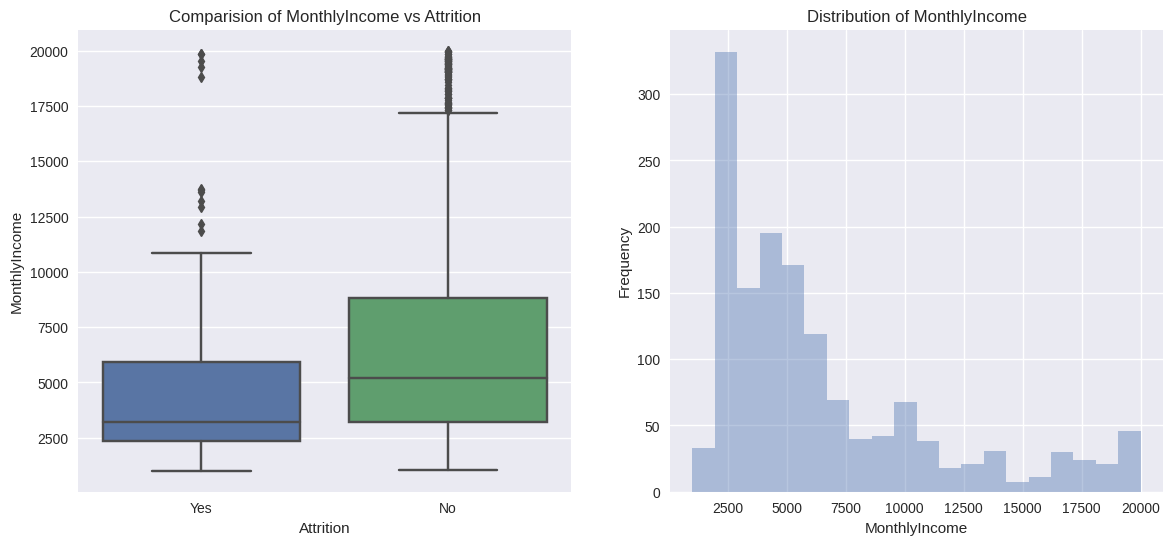

In [15]:
NumericalVariables_targetPlots(employee_data,"MonthlyIncome")

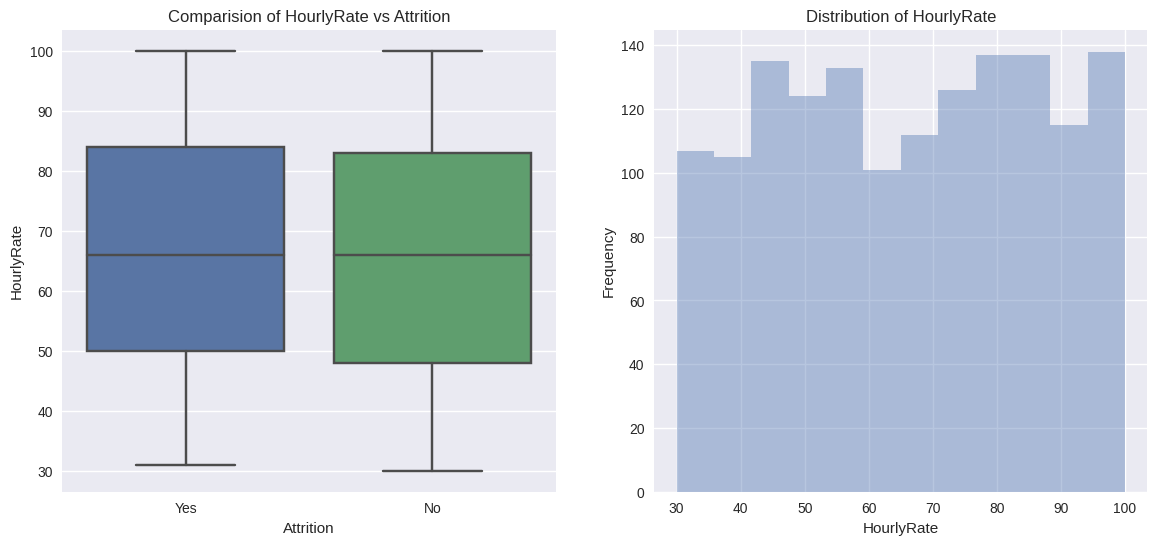

In [16]:
NumericalVariables_targetPlots(employee_data,"HourlyRate")

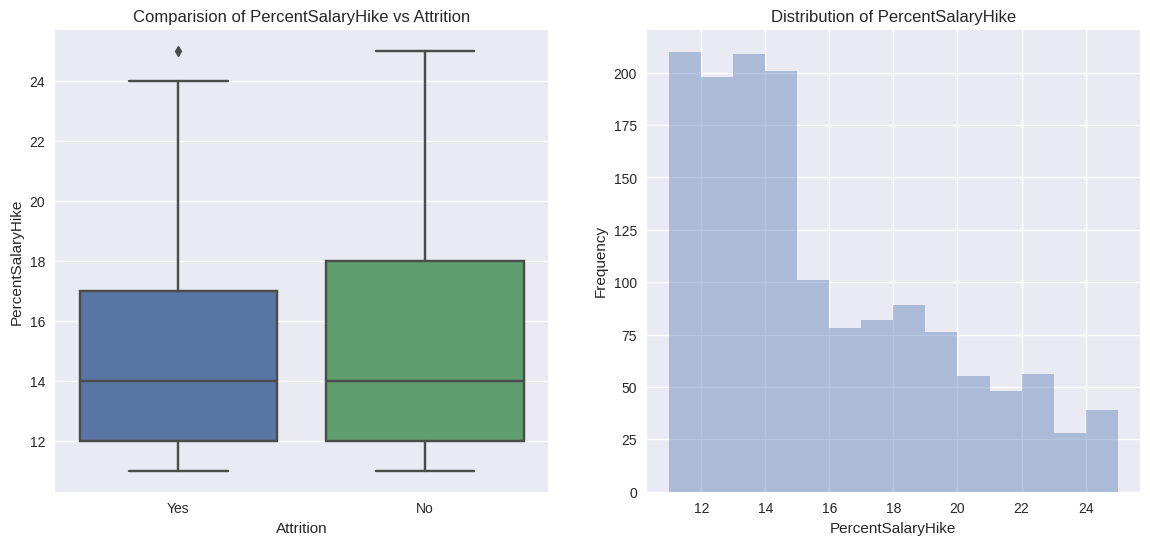

In [17]:
NumericalVariables_targetPlots(employee_data,"PercentSalaryHike")

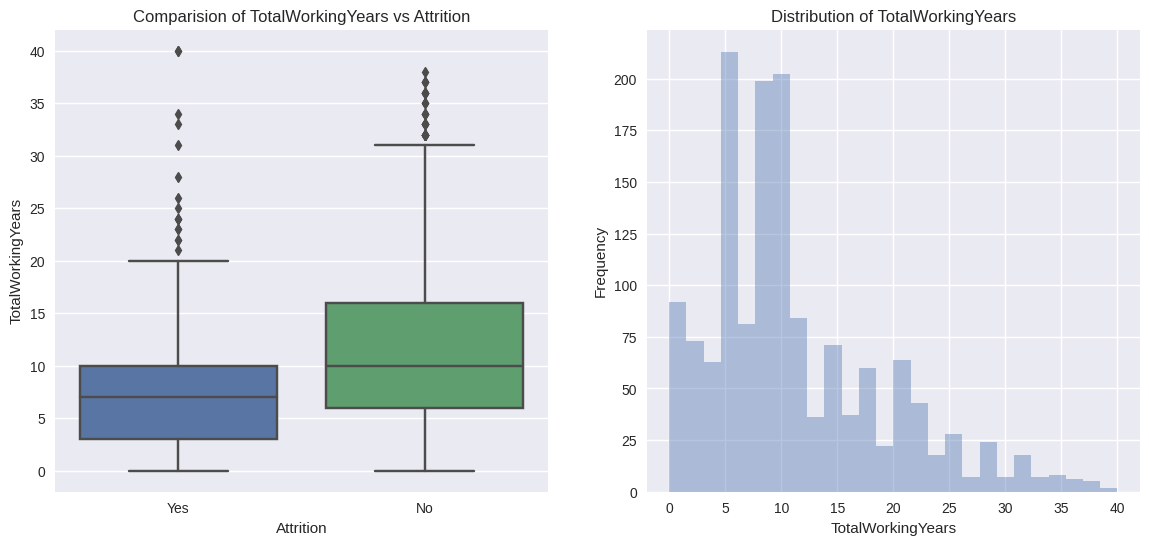

In [18]:
NumericalVariables_targetPlots(employee_data,"TotalWorkingYears")

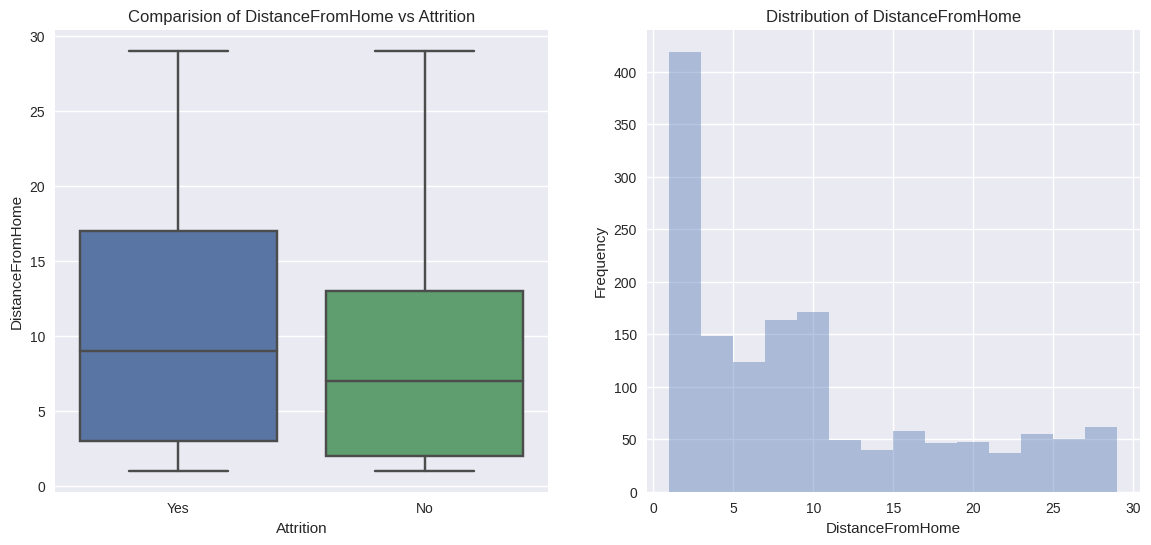

In [19]:
NumericalVariables_targetPlots(employee_data,"DistanceFromHome")

In [20]:
#cross tabulation between attrition and JobInvolvement
pd.crosstab(employee_data.JobInvolvement,employee_data.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [21]:
#calculating the percentage of people having different job involvement rate
round(employee_data.JobInvolvement.value_counts()/employee_data.shape[0] * 100,2)

3    59.05
2    25.51
4     9.80
1     5.65
Name: JobInvolvement, dtype: float64

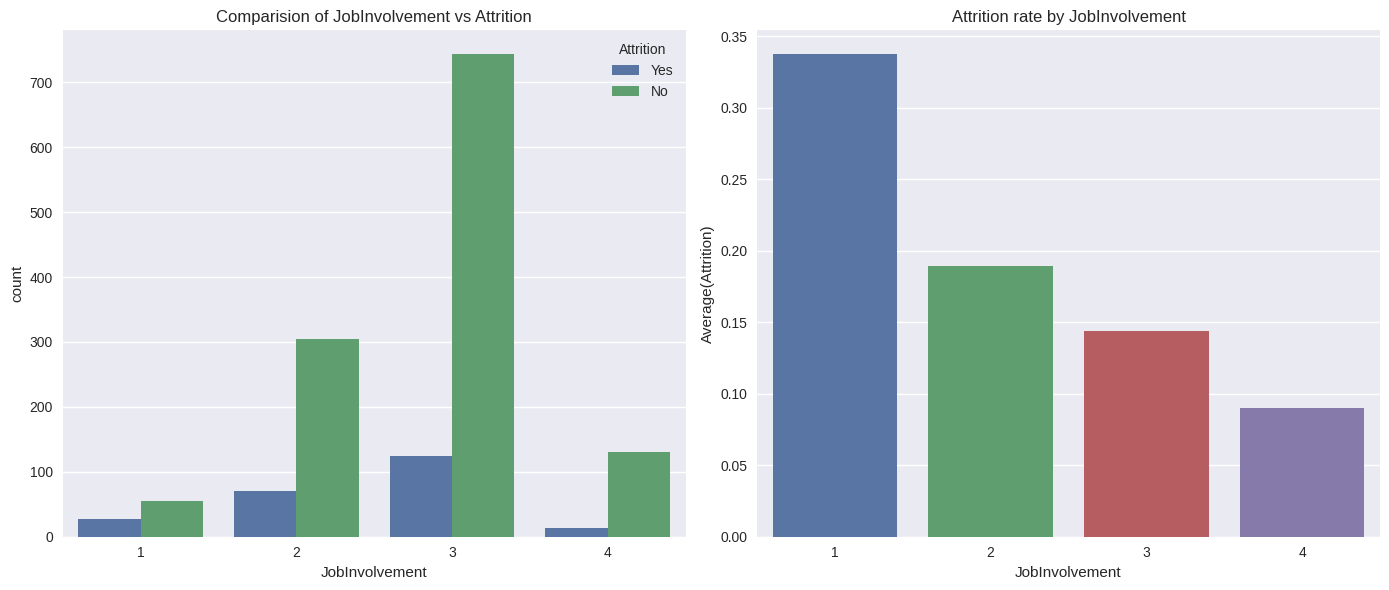

In [22]:
CategoricalVariables_targetPlots(employee_data,"JobInvolvement")

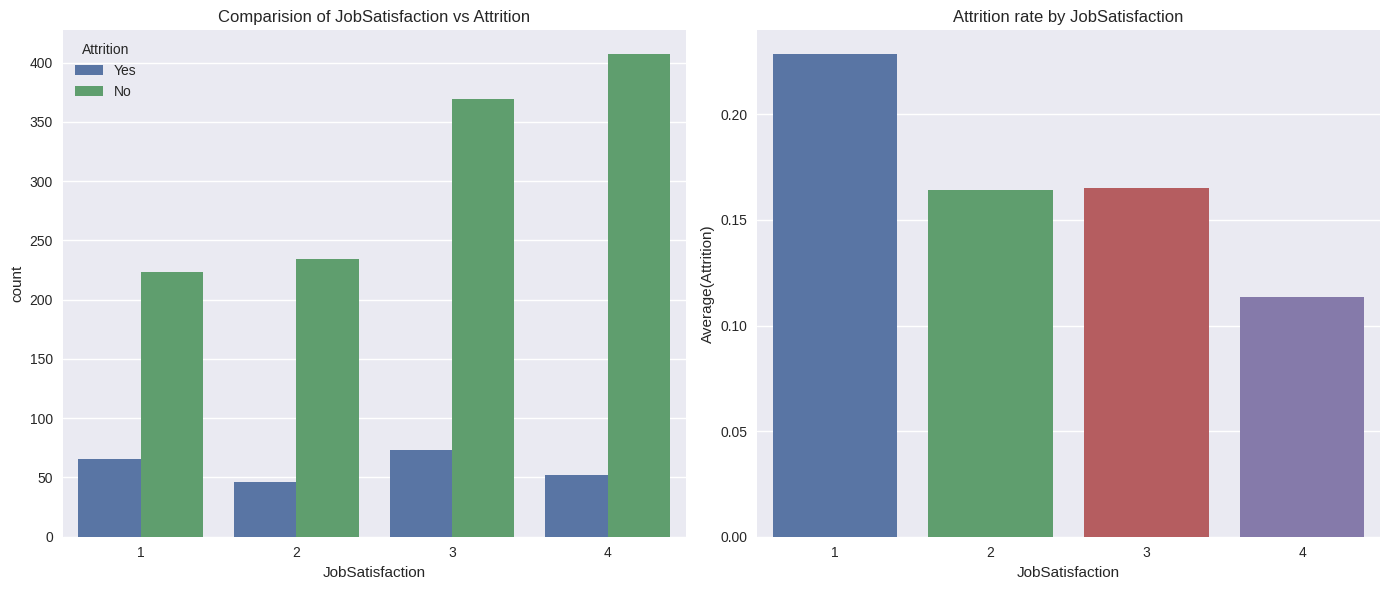

In [23]:
CategoricalVariables_targetPlots(employee_data,"JobSatisfaction")

In [24]:
#checking the number of categories under performance rating
employee_data.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [25]:
#calculate the percentage of performance rating per category in the whole dataset
round(employee_data.PerformanceRating.value_counts()/employee_data.shape[0] * 100,2)

3    84.63
4    15.37
Name: PerformanceRating, dtype: float64

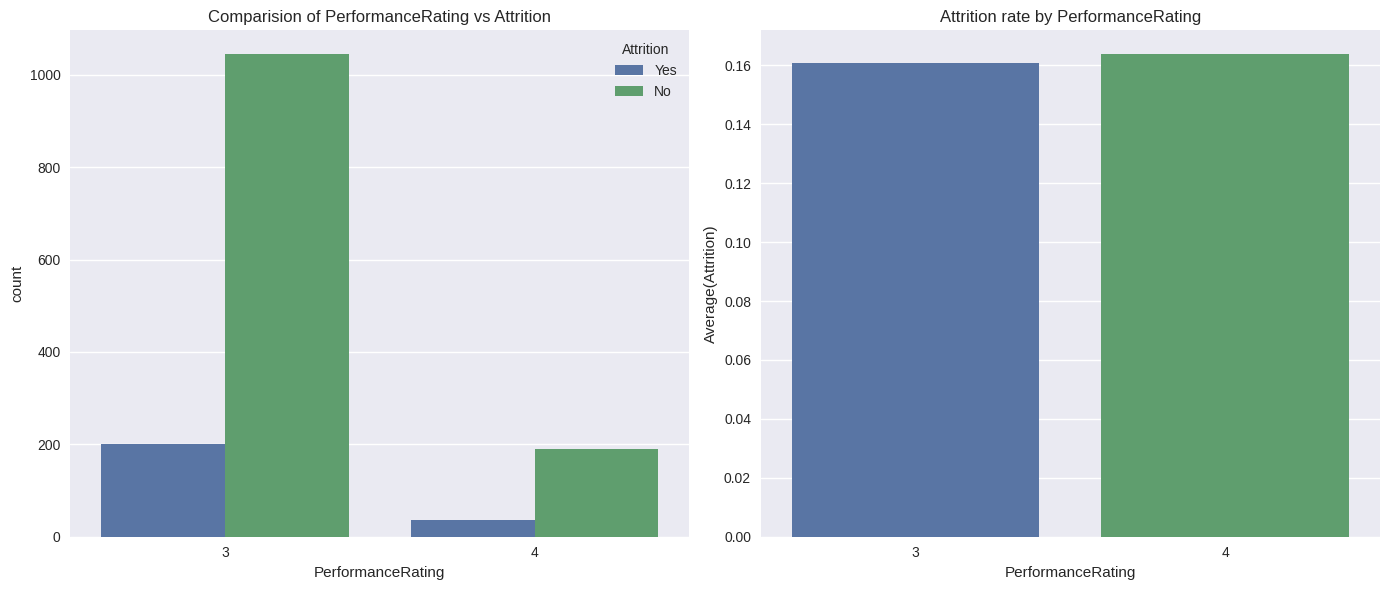

In [26]:
CategoricalVariables_targetPlots(employee_data,"PerformanceRating")

In [27]:
#percentage of each relationship satisfaction category across the data
round(employee_data.RelationshipSatisfaction.value_counts()/employee_data.shape[0],2)

3    0.31
4    0.29
2    0.21
1    0.19
Name: RelationshipSatisfaction, dtype: float64

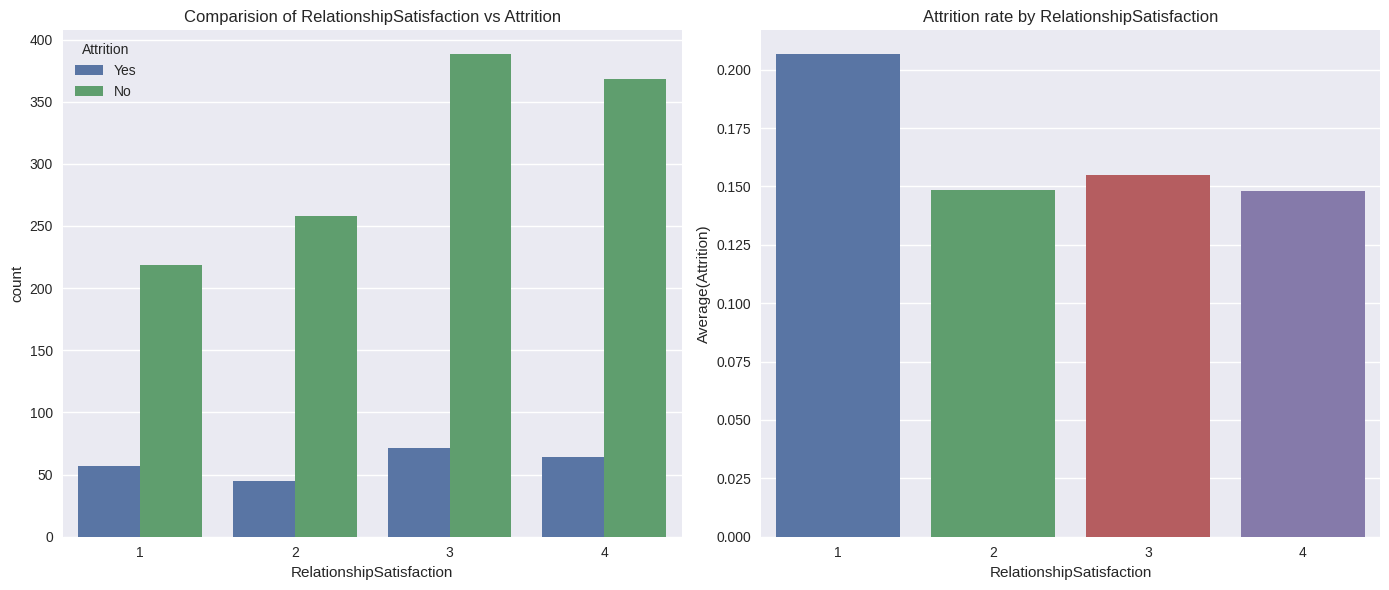

In [28]:
CategoricalVariables_targetPlots(employee_data,"RelationshipSatisfaction")

In [29]:
#percentage of worklife balance rating across the company data
round(employee_data.WorkLifeBalance.value_counts()/employee_data.shape[0],2)

3    0.61
2    0.23
4    0.10
1    0.05
Name: WorkLifeBalance, dtype: float64

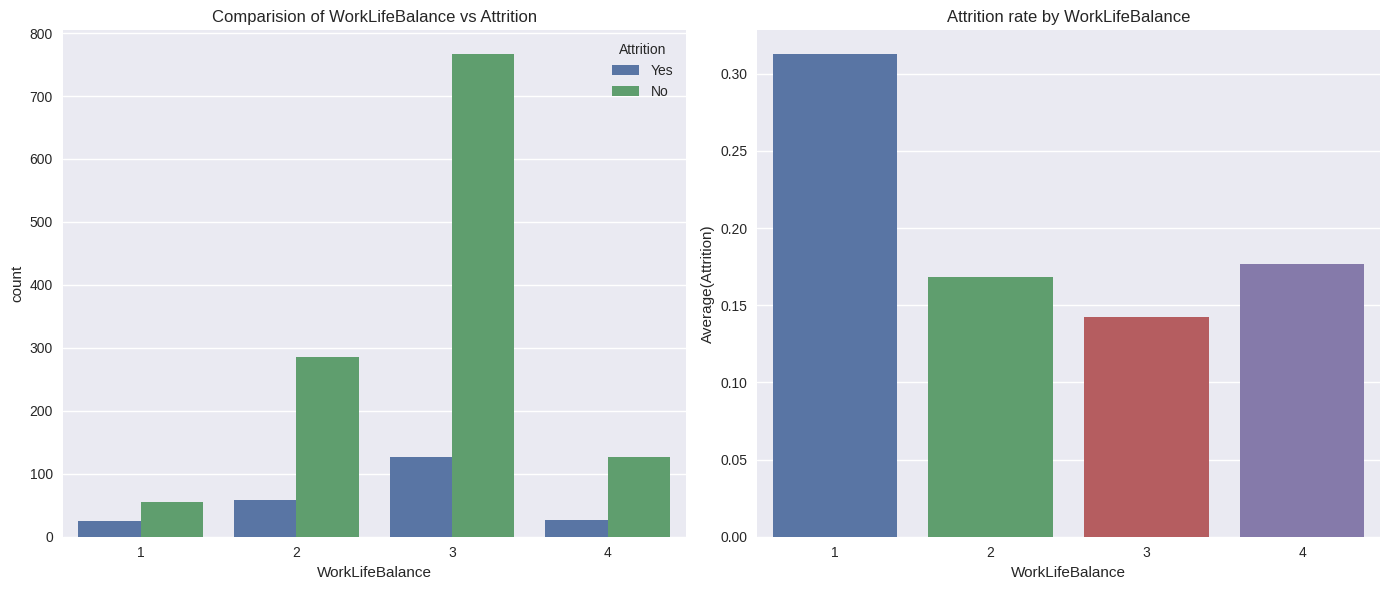

In [30]:
CategoricalVariables_targetPlots(employee_data,"WorkLifeBalance")

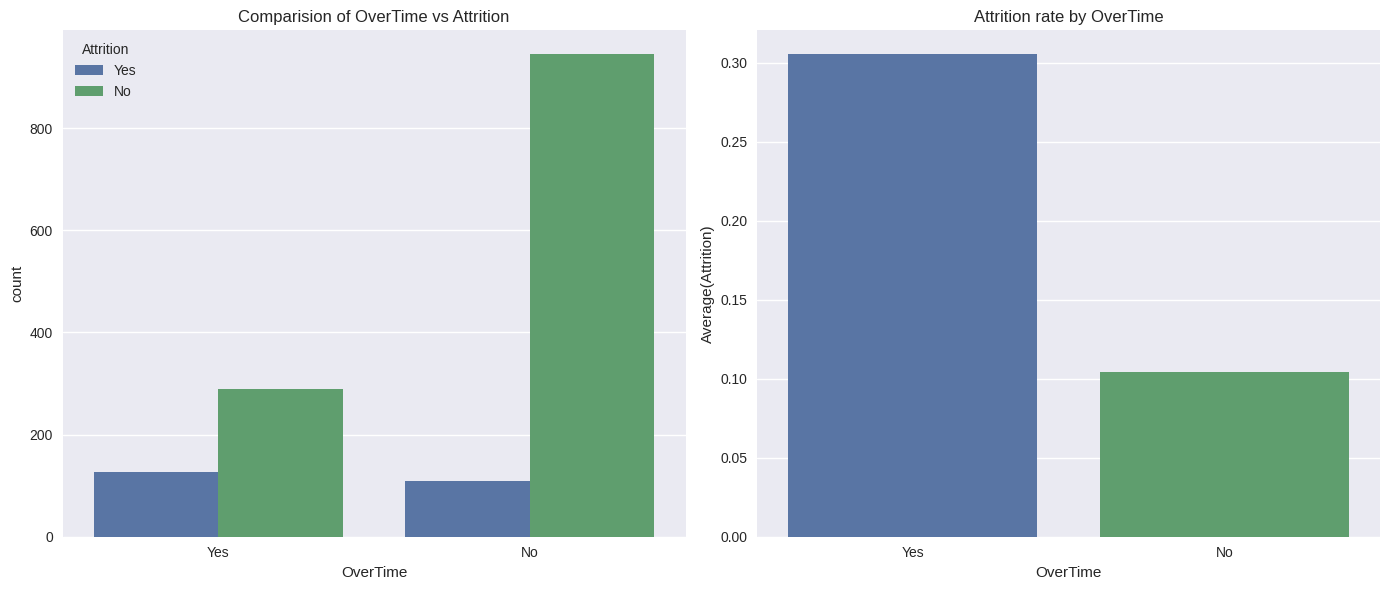

In [31]:
CategoricalVariables_targetPlots(employee_data,"OverTime")

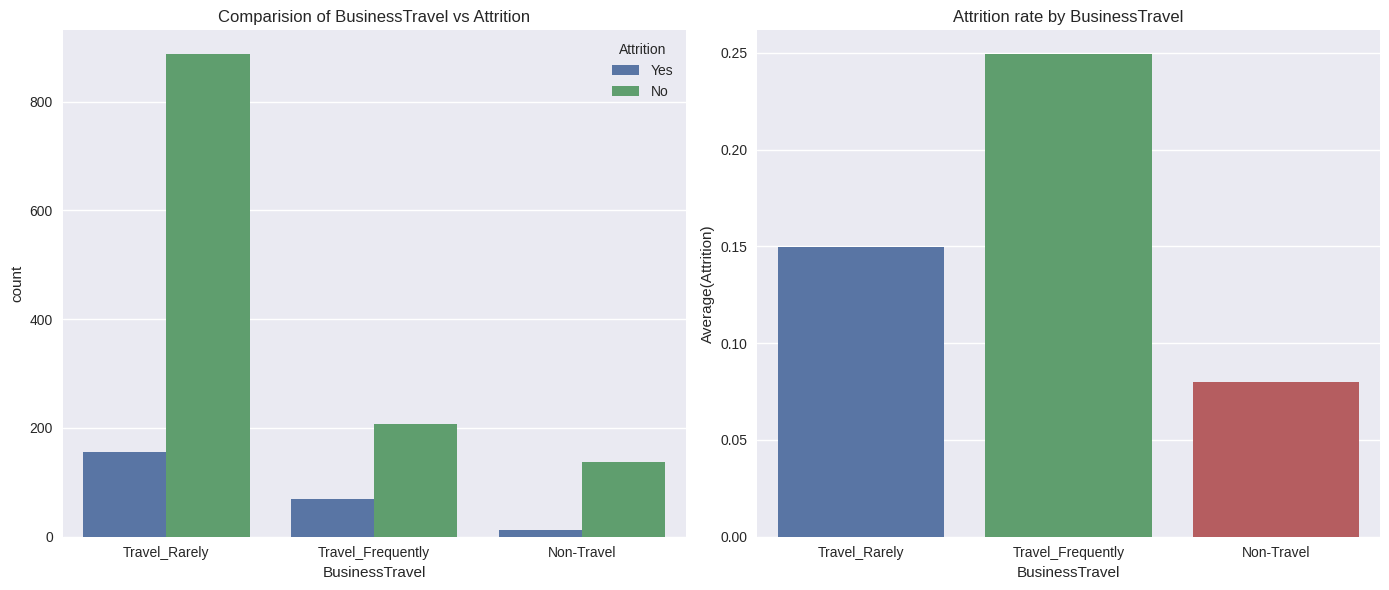

In [32]:
CategoricalVariables_targetPlots(employee_data,segment_by="BusinessTravel")

In [33]:
employee_data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

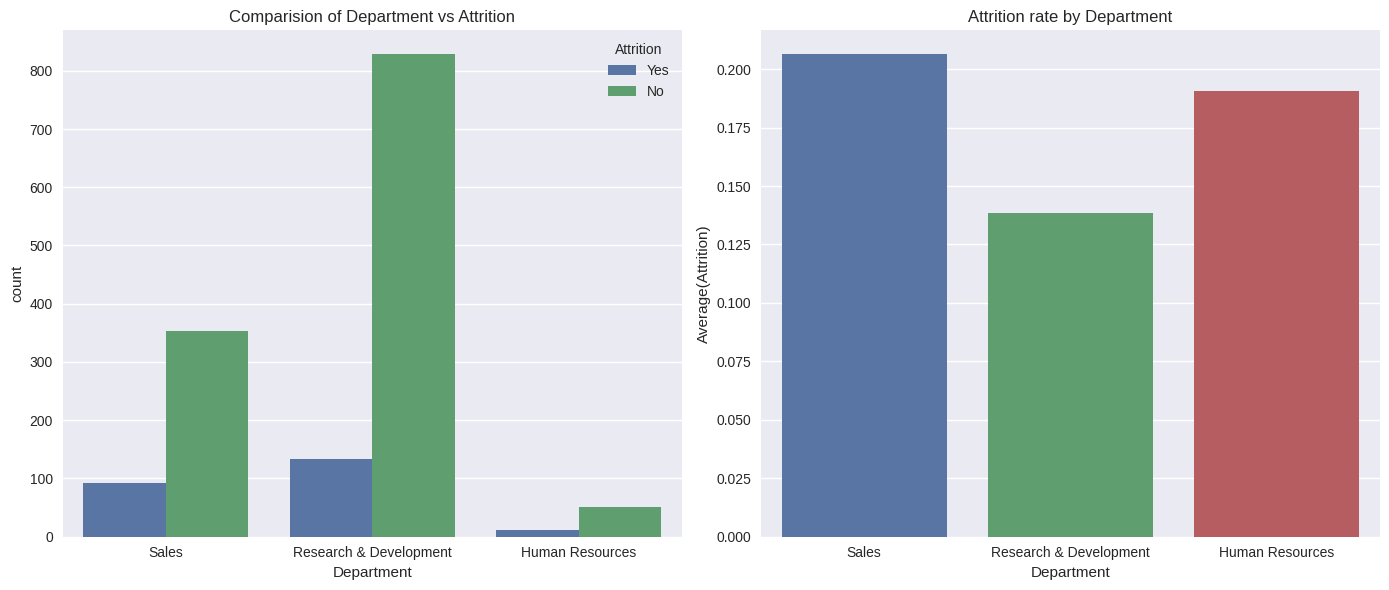

In [34]:
CategoricalVariables_targetPlots(employee_data,segment_by="Department")

In [35]:
employee_data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

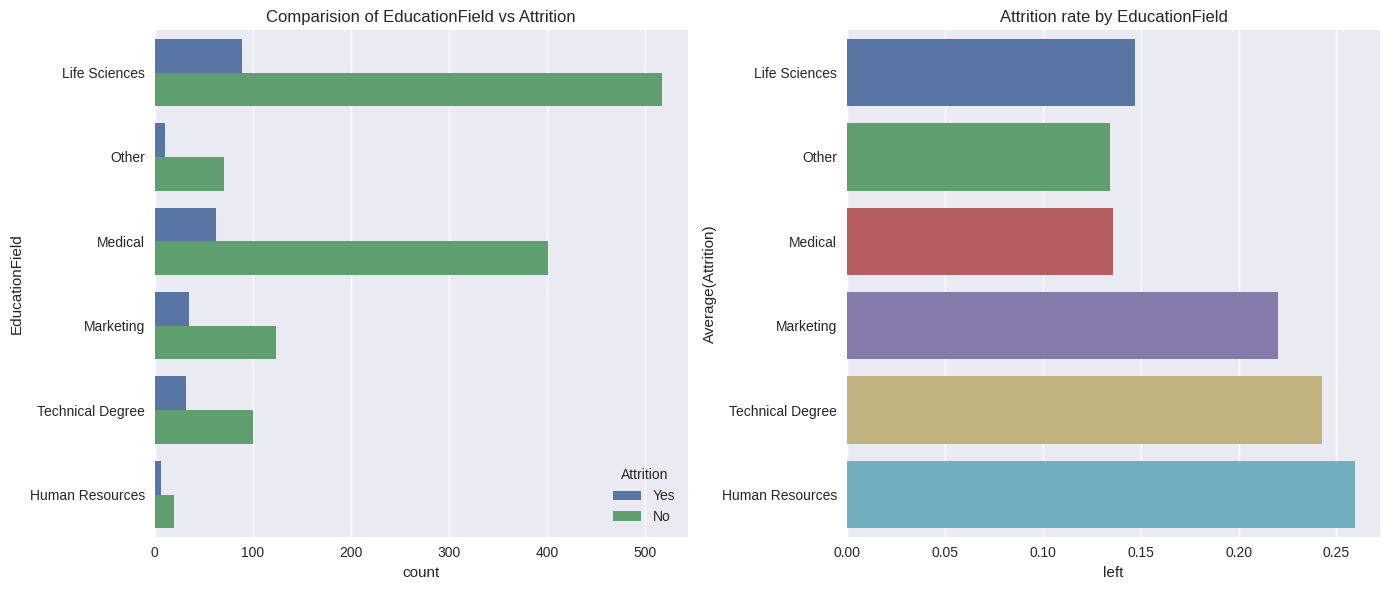

In [36]:
CategoricalVariables_targetPlots(employee_data,"EducationField",invert_axis=True)

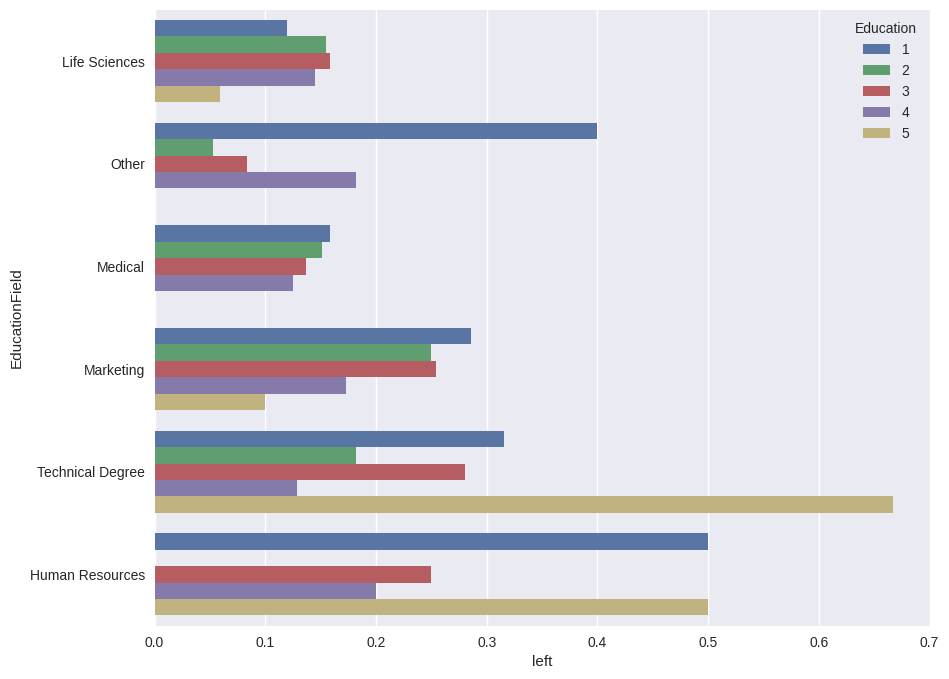

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(y = "EducationField", x = "left", hue="Education", data=employee_data,ci=None)
plt.show()

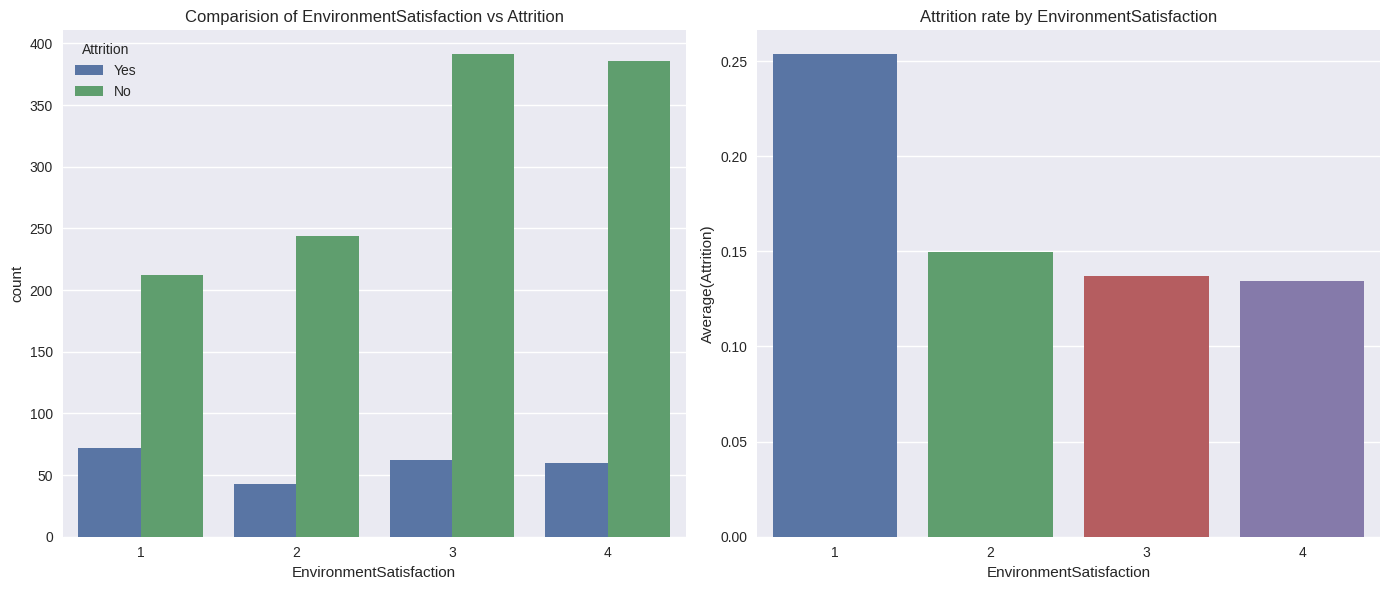

In [38]:
CategoricalVariables_targetPlots(employee_data,"EnvironmentSatisfaction")

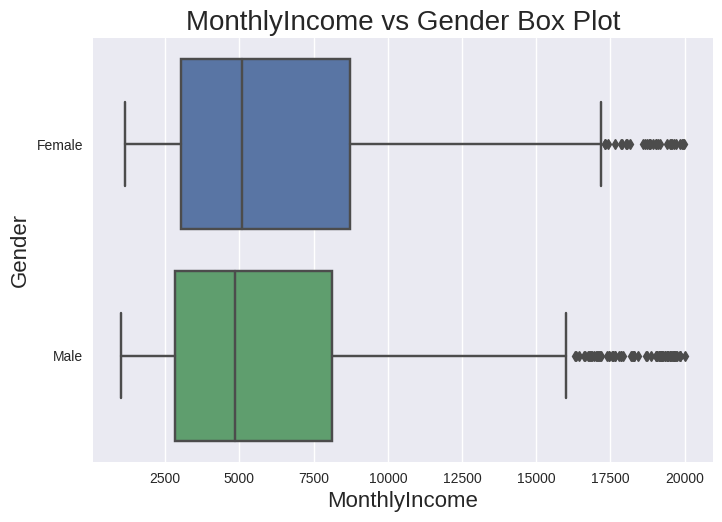

In [39]:
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_data)
plt.title('MonthlyIncome vs Gender Box Plot', fontsize=20)      
plt.xlabel('MonthlyIncome', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.show()

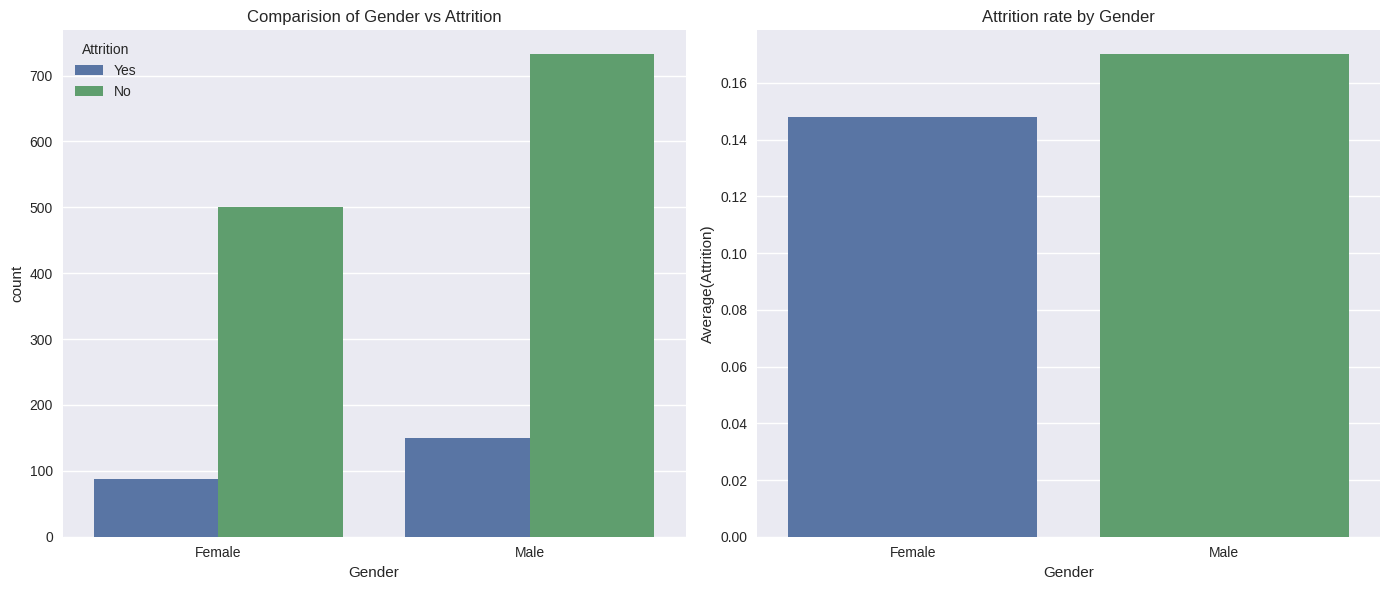

In [40]:
CategoricalVariables_targetPlots(employee_data,"Gender")

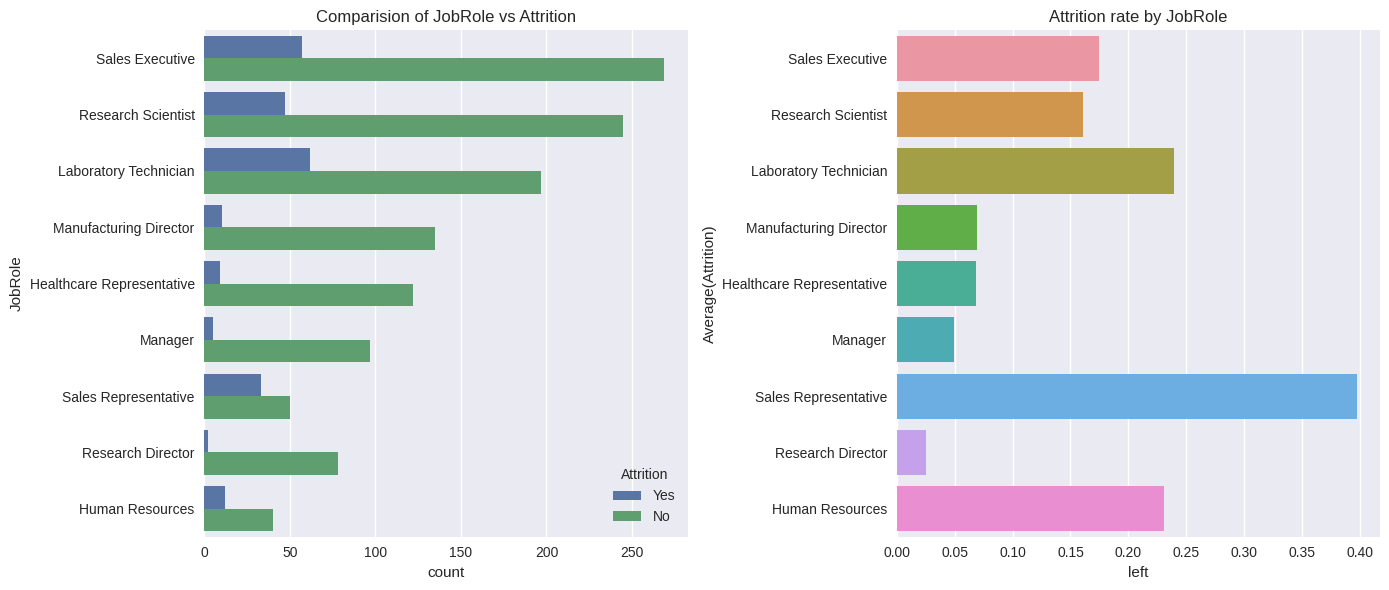

In [41]:
CategoricalVariables_targetPlots(employee_data,"JobRole",invert_axis=True)

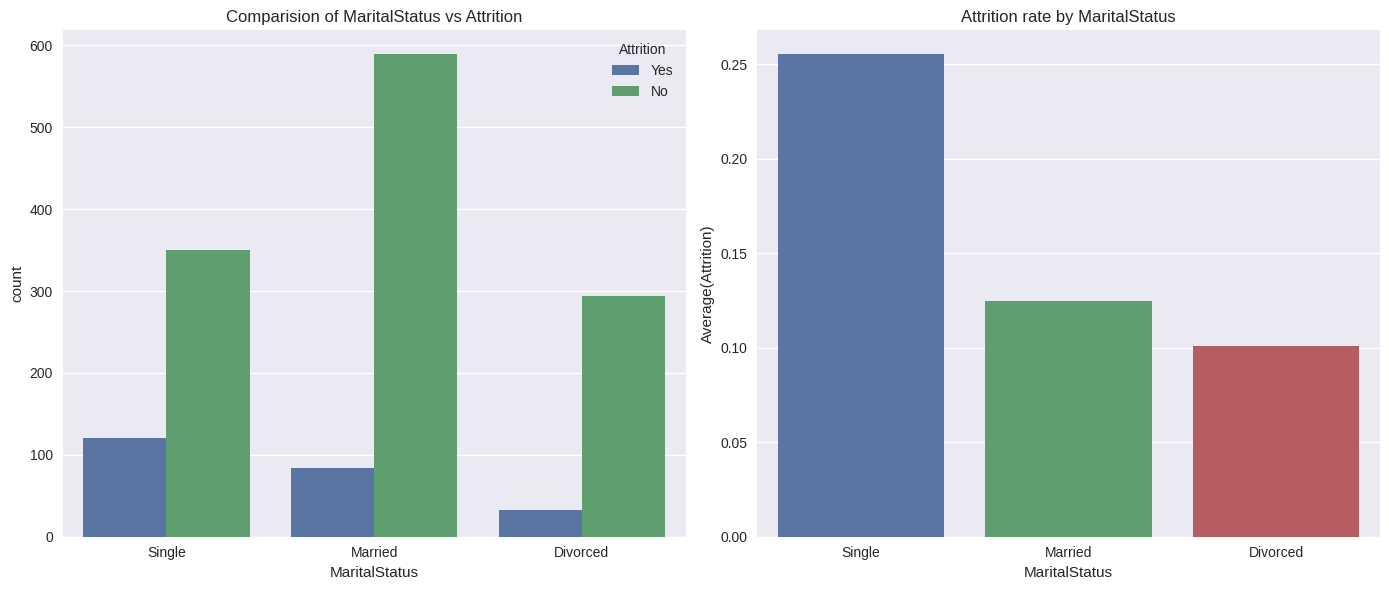

In [42]:
CategoricalVariables_targetPlots(employee_data,"MaritalStatus")

In [43]:
temp = []
for col in employee_data.columns:
    if len(employee_data[col].unique()) == 1:
        temp.append(col)
        employee_data.drop(col,inplace=True,axis=1)

In [44]:
employee_data.shape

(1470, 33)

In [45]:
temp

['EmployeeCount', 'Over18', 'StandardHours']

In [46]:
employee_data.drop(['EmployeeNumber'], axis = 1, inplace = True)

<Axes: >

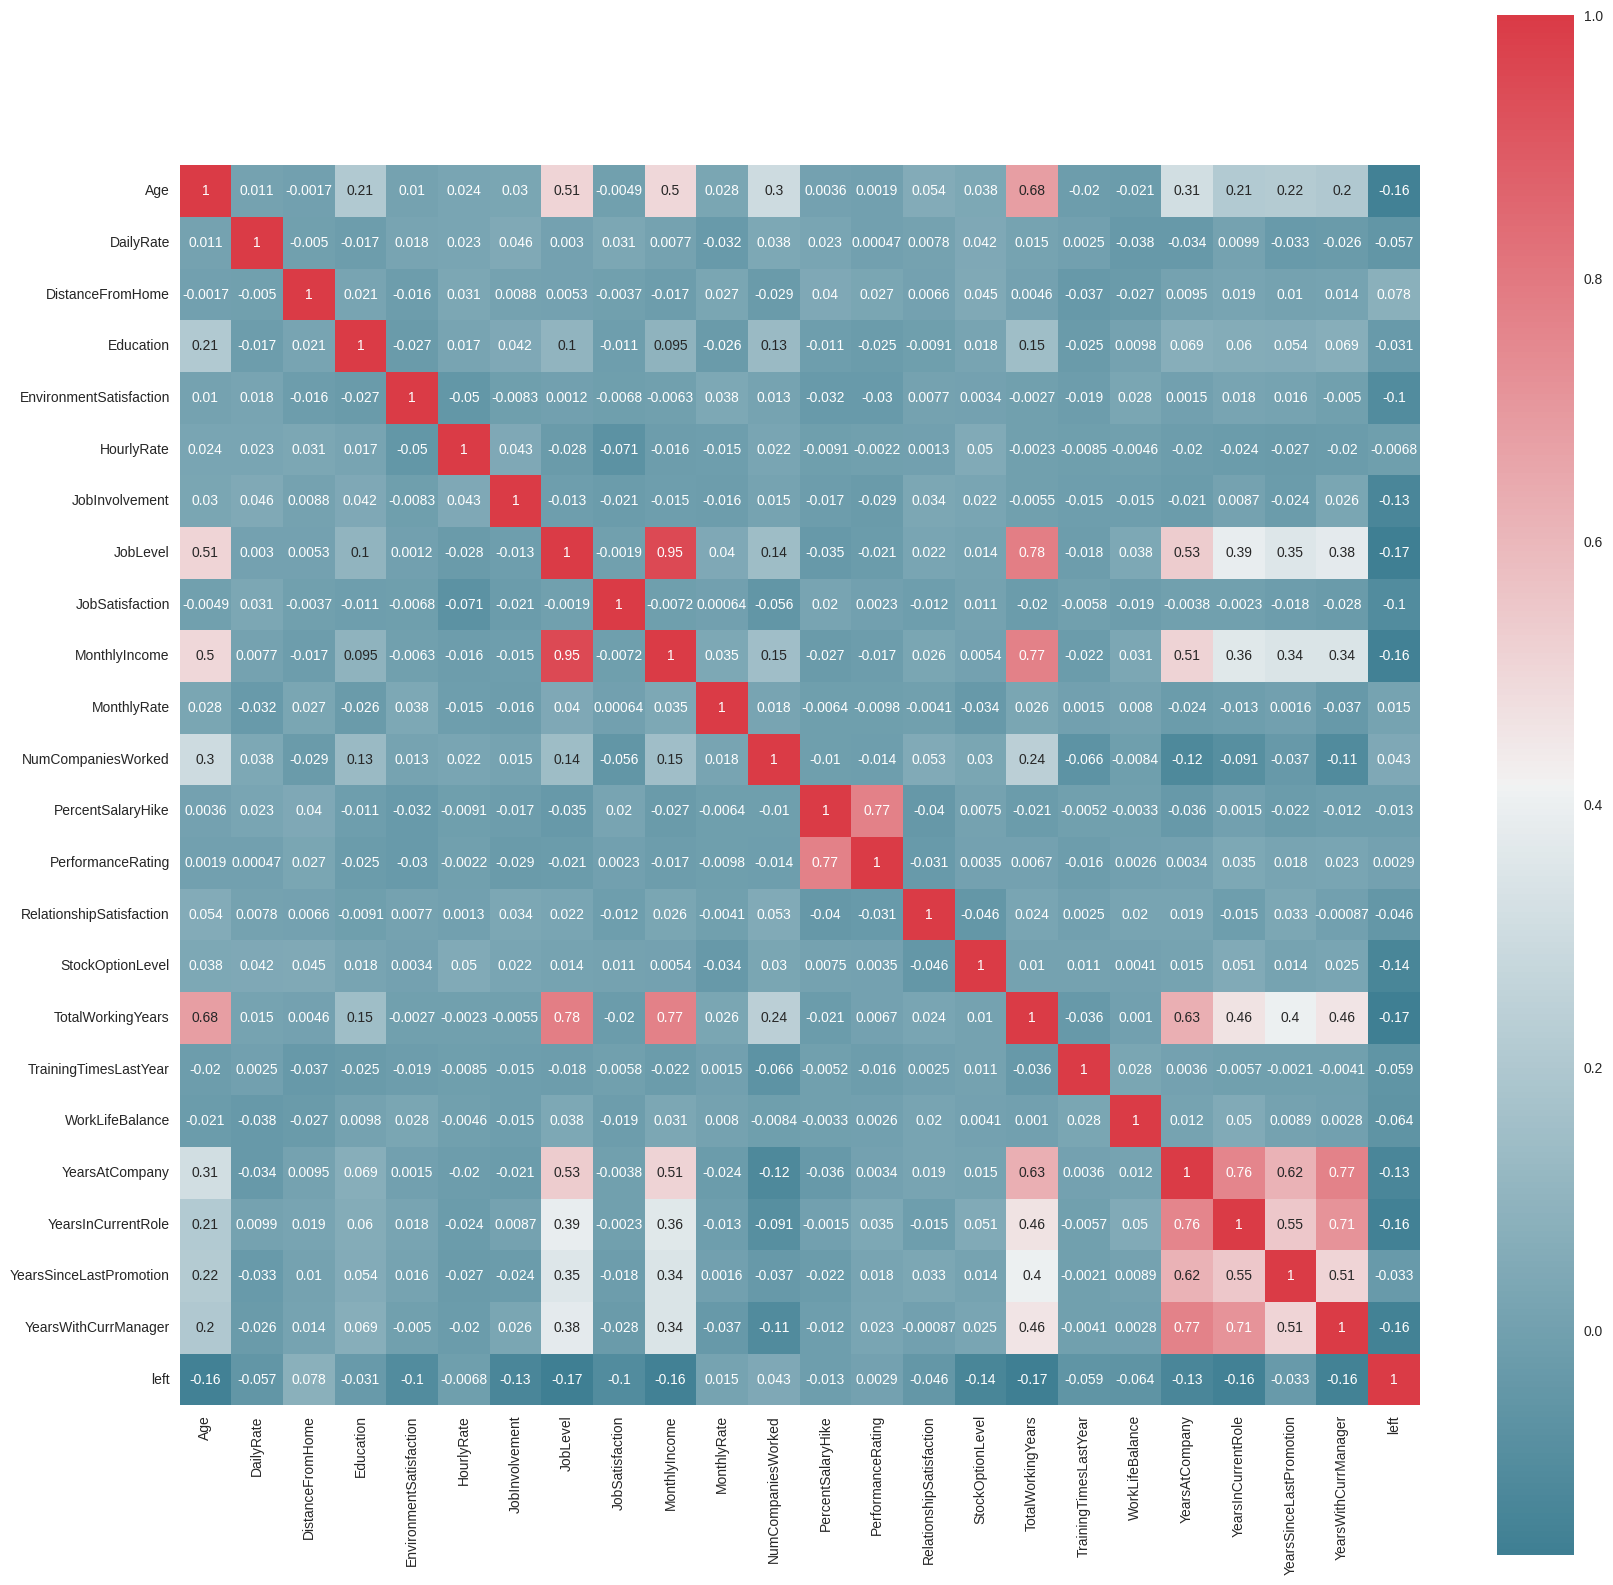

In [47]:
f, ax = plt.subplots(figsize=(20, 20))
corr = employee_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

In [48]:
from sklearn.model_selection import train_test_split

#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#to create a confusion matrix
from sklearn.metrics import confusion_matrix

#import whole class of metrics
from sklearn import metrics

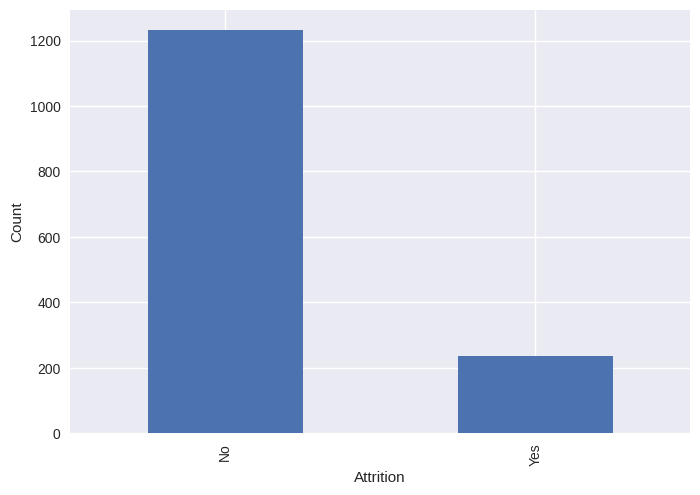

In [49]:
employee_data.Attrition.value_counts().plot(kind = "bar")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

In [50]:
employee_data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [51]:
#copying the main employee data to another dataframe
employee_data_new = employee_data.copy()

In [52]:
#data types of variables
dict(employee_data_new.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'Gender': dtype('O'),
 'HourlyRate': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype(

In [53]:
#segregating the variables based on datatypes

numeric_variable_names  = [key for key in dict(employee_data_new.dtypes) if dict(employee_data_new.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

categorical_variable_names = [key for key in dict(employee_data_new.dtypes) if dict(employee_data_new.dtypes)[key] in ["object"]]

In [54]:
categorical_variable_names

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [55]:
#store the numerical variables data in seperate dataset

employee_data_num = employee_data_new[numeric_variable_names]

In [56]:
#store the categorical variables data in seperate dataset

employee_data_cat = employee_data_new[categorical_variable_names]
#dropping the attrition 
employee_data_cat.drop(["Attrition"],axis=1,inplace=True)

In [57]:
#converting into dummy variables

employee_data_cat = pd.get_dummies(employee_data_cat)

In [58]:
#Merging the both numerical and categorical data

employee_data_final = pd.concat([employee_data_num, employee_data_cat,employee_data_new[["Attrition"]]],axis=1)

In [59]:
employee_data_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,1,0,0,0,1,0,1,Yes
1,49,279,8,1,3,61,2,2,2,5130,...,0,1,0,0,0,1,0,1,0,No
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,1,0,1,Yes
3,33,1392,3,4,4,56,3,1,3,2909,...,0,1,0,0,0,1,0,0,1,No
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,1,0,1,0,No


In [60]:
#final features
features =  list(employee_data_final.columns.difference(["Attrition"]))

In [61]:
features

['Age',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'DailyRate',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'DistanceFromHome',
 'Education',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EnvironmentSatisfaction',
 'Gender_Female',
 'Gender_Male',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'JobSatisfaction',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime_No',
 'OverTime_

In [62]:
#seperating the target and predictors

X = employee_data_final[features]
y = employee_data_final[["Attrition"]]

In [63]:
X.shape

(1470, 52)

In [64]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

#function for crossvalidate score
from sklearn.model_selection import cross_validate

#to find the best 
from sklearn.model_selection import GridSearchCV

In [65]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 100)

In [66]:
y_train.Attrition.value_counts()/len(y_train)

No     0.838678
Yes    0.161322
Name: Attrition, dtype: float64

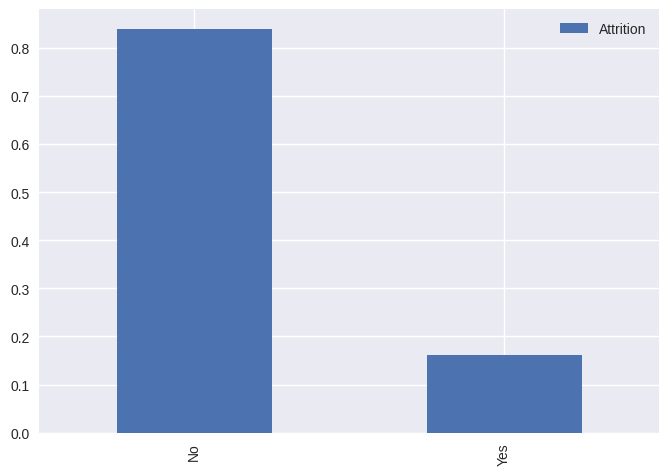

In [67]:
pd.DataFrame(y_train.Attrition.value_counts()/len(y_train)).plot(kind = "bar")
plt.show()

In [68]:
#Proportion of test data
y_test.Attrition.value_counts()/len(y_test)

No     0.839002
Yes    0.160998
Name: Attrition, dtype: float64

In [69]:
#make a pipeline for decision tree model 

pipelines = {
    "clf": make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))
}

In [70]:
scores = cross_validate(pipelines['clf'], X_train, y_train,return_train_score=True)

In [71]:
scores['test_score'].mean()

1.0

In [72]:
decisiontree_hyperparameters = {
    "decisiontreeclassifier__max_depth": np.arange(3,12),
    "decisiontreeclassifier__max_features": np.arange(3,10),
    "decisiontreeclassifier__min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}

In [73]:
pipelines['clf']

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=100))])

In [74]:
#Create a cross validation object from decision tree classifier and it's hyperparameters

clf_model = GridSearchCV(pipelines['clf'], decisiontree_hyperparameters, cv=5, n_jobs=-1)

In [75]:
#fit the model with train data
clf_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=3,
                                                               random_state=100))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeclassifier__min_samples_leaf': array([1, 2]),
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                       5, 6, 7,
                                                                       8, 9, 10,
                                                                       11, 12,
                                                                       13, 14,
                                                                       15]})

In [76]:
#Display the best parameters for Decision Tree Model
clf_model.best_params_

{'decisiontreeclassifier__max_depth': 11,
 'decisiontreeclassifier__max_features': 5,
 'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__min_samples_split': 12}

In [77]:
#Display the best score for the fitted model
clf_model.best_score_

0.9572626095192991

In [78]:
#In Pipeline we can use the string names to get the decisiontreeclassifer

clf_model.best_estimator_.named_steps['decisiontreeclassifier']

DecisionTreeClassifier(max_depth=11, max_features=5, min_samples_leaf=2,
                       min_samples_split=12, random_state=100)

In [79]:
#saving into a variable to get graph

clf_best_model = clf_model.best_estimator_.named_steps['decisiontreeclassifier']

In [80]:
#Making a dataframe of actual and predicted data from test set

tree_test_pred = pd.concat([y_test.reset_index(drop = True),pd.DataFrame(clf_model.predict(X_test))],axis=1)
tree_test_pred.columns = ["actual","predicted"]

#setting the index to original index
tree_test_pred.index = y_test.index

In [81]:
tree_test_pred.head()

,actual,predicted
34,Yes,Yes
1432,No,No
334,No,No
1068,Yes,No
736,No,No


In [82]:
#keeping only positive condition (yes for attrition)

pred_probability = pd.DataFrame(p[1] for p in clf_model.predict_proba(X_test))
pred_probability.columns = ["predicted_prob"]
pred_probability.index = y_test.index

In [83]:
#merging the predicted data and its probability value

tree_test_pred = pd.concat([tree_test_pred,pred_probability],axis=1)

In [84]:
tree_test_pred.head()

,actual,predicted,predicted_prob
34,Yes,Yes,1.0
1432,No,No,0.0
334,No,No,0.0
1068,Yes,No,0.0
736,No,No,0.0


In [85]:
#converting the labels Yes --> 1 and No --> 0 for further operations below

tree_test_pred["actual_left"] = np.where(tree_test_pred["actual"] == "Yes",1,0)
tree_test_pred["predicted_left"] = np.where(tree_test_pred["predicted"] == "Yes",1,0)

In [86]:
tree_test_pred.head()

,actual,predicted,predicted_prob,actual_left,predicted_left
34,Yes,Yes,1.0,1,1
1432,No,No,0.0,0,0
334,No,No,0.0,0,0
1068,Yes,No,0.0,1,0
736,No,No,0.0,0,0


In [87]:
#confusion matrix
metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,labels=["Yes","No"])

array([[ 51,  20],
       [ 16, 354]])

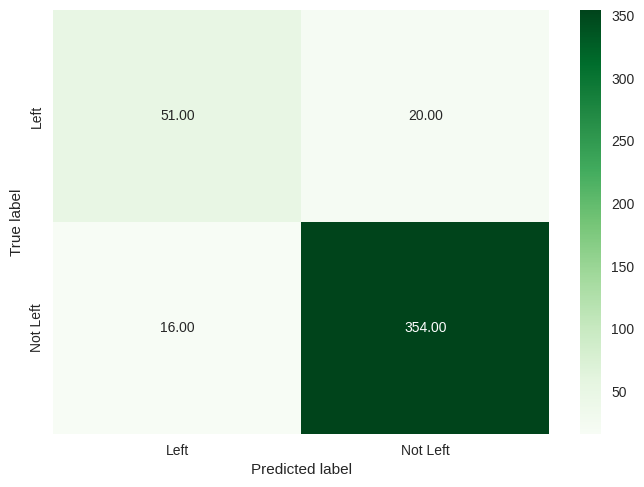

In [88]:
#confusion matrix visualization using seaborn heatmap

sns.heatmap(metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,
                                    labels=["Yes","No"]),cmap="Greens",annot=True,fmt=".2f",
           xticklabels = ["Left", "Not Left"] , yticklabels = ["Left", "Not Left"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [89]:
# creating a new DataFrame with the age counts and percentages
age_data = pd.DataFrame({'Counts': employee_data['Age'].value_counts(), 'Percentages': employee_data["Age"].value_counts()/len(employee_data) * 100})
print(age_data.to_string(formatters={'Percentages': '{:.2f}%'.format}))

    Counts Percentages
35      78       5.31%
34      77       5.24%
36      69       4.69%
31      69       4.69%
29      68       4.63%
32      61       4.15%
30      60       4.08%
33      58       3.95%
38      58       3.95%
40      57       3.88%
37      50       3.40%
27      48       3.27%
28      48       3.27%
42      46       3.13%
39      42       2.86%
45      41       2.79%
41      40       2.72%
26      39       2.65%
44      33       2.24%
46      33       2.24%
43      32       2.18%
50      30       2.04%
25      26       1.77%
24      26       1.77%
49      24       1.63%
47      24       1.63%
55      22       1.50%
51      19       1.29%
53      19       1.29%
48      19       1.29%
54      18       1.22%
52      18       1.22%
22      16       1.09%
56      14       0.95%
23      14       0.95%
58      14       0.95%
21      13       0.88%
20      11       0.75%
59      10       0.68%
19       9       0.61%
18       8       0.54%
60       5       0.34%
57       4 

In [90]:
# Using the colorblind palette from the Seaborn library for visualization
colors = sns.color_palette('colorblind')

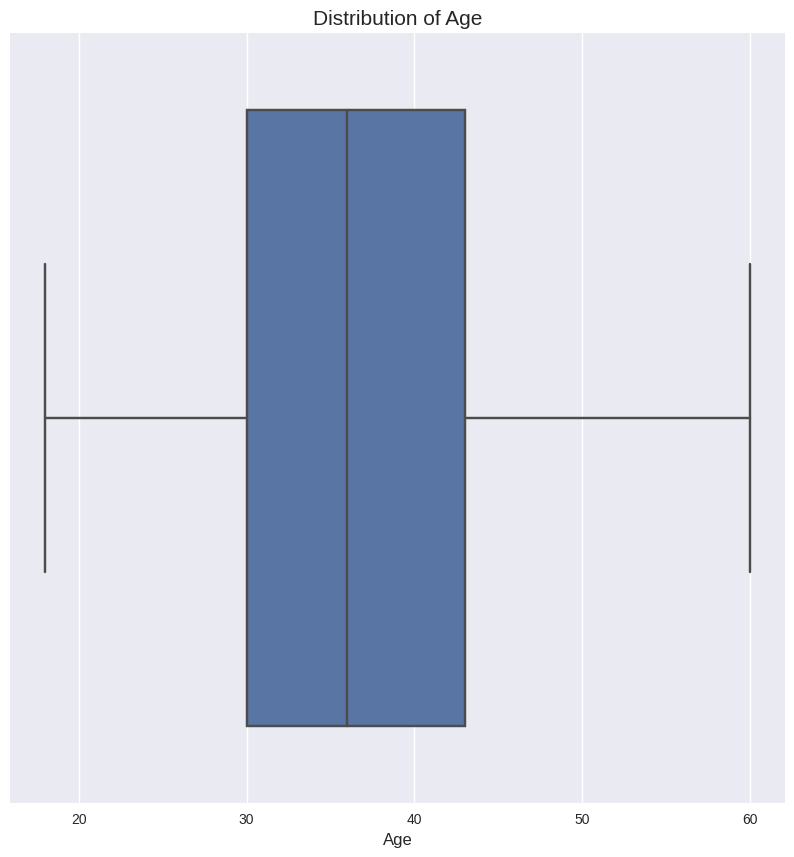

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x=employee_data['Age'], ax=ax)
ax.set_title('Distribution of Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
# Show plot
plt.show()

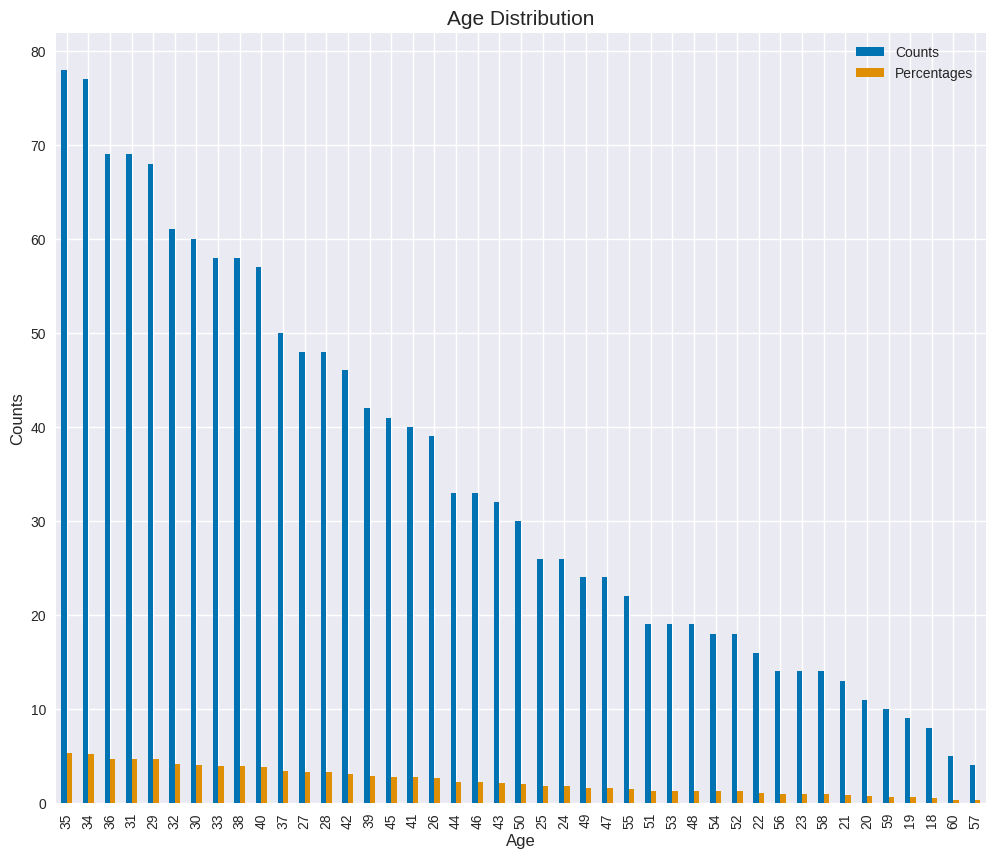

In [92]:
age_data.plot(kind='bar', figsize=(12,10),color=colors)
# setting the chart title and axis labels
plt.title('Age Distribution', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Counts',fontsize=12)

# show the chart
plt.show()

In [93]:
# creating a new DataFrame with the attrition counts and percentages
attrition_data = pd.DataFrame({'Counts': employee_data['Attrition'].value_counts(), 'Percentages': employee_data["Attrition"].value_counts()/len(employee_data) * 100})
print(attrition_data.to_string(formatters={'Percentages': '{:.2f}%'.format}))

     Counts Percentages
No     1233      83.88%
Yes     237      16.12%


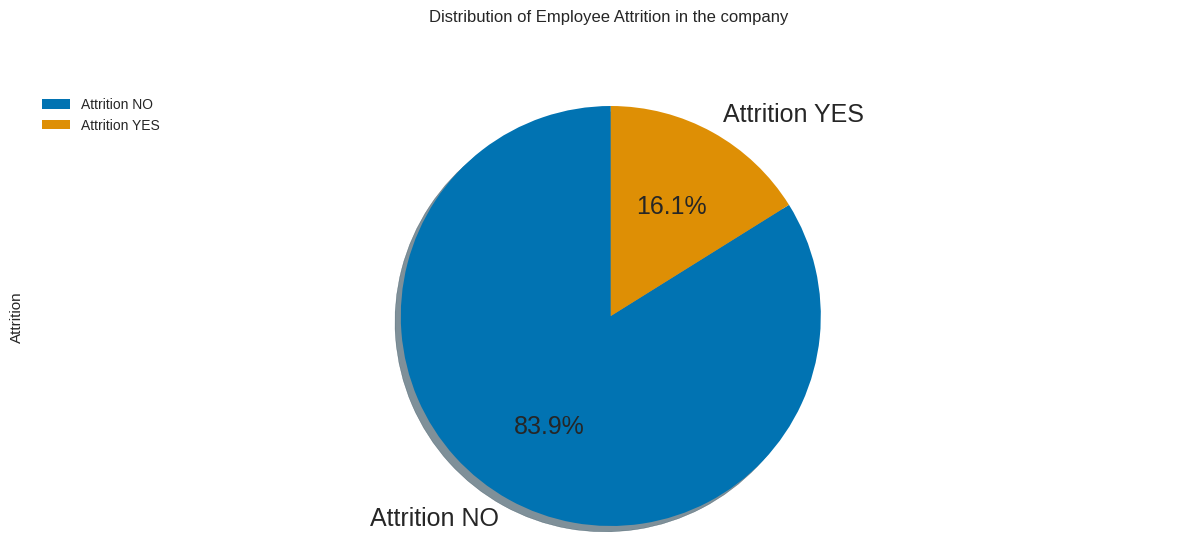

In [94]:
labels = 'Attrition NO', 'Attrition YES'
employee_data['Attrition'].astype(str).value_counts().plot(kind='pie',figsize = (15,6), fontsize=18, autopct= '%1.1f%%', startangle= 90, shadow = True, labels = labels,colors=colors)
plt.title('Distribution of Employee Attrition in the company ', y=1.12)
plt.axis('equal')
plt.legend(labels=labels, loc='upper left')
plt.show()

In [95]:
# creating a new DataFrame with the DistanceFromHome counts and percentages
DistanceFromHome_data = pd.DataFrame({'Counts': employee_data['DistanceFromHome'].value_counts(), 'Percentages': employee_data["DistanceFromHome"].value_counts()/len(employee_data) * 100})
print(DistanceFromHome_data.to_string(formatters={'Percentages': '{:.2f}%'.format}))

    Counts Percentages
2      211      14.35%
1      208      14.15%
10      86       5.85%
9       85       5.78%
3       84       5.71%
7       84       5.71%
8       80       5.44%
5       65       4.42%
4       64       4.35%
6       59       4.01%
16      32       2.18%
11      29       1.97%
24      28       1.90%
23      27       1.84%
29      27       1.84%
15      26       1.77%
18      26       1.77%
26      25       1.70%
25      25       1.70%
20      25       1.70%
28      23       1.56%
19      22       1.50%
14      21       1.43%
12      20       1.36%
17      20       1.36%
22      19       1.29%
13      19       1.29%
21      18       1.22%
27      12       0.82%


In [96]:
employee_data["DistanceFromHome"].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

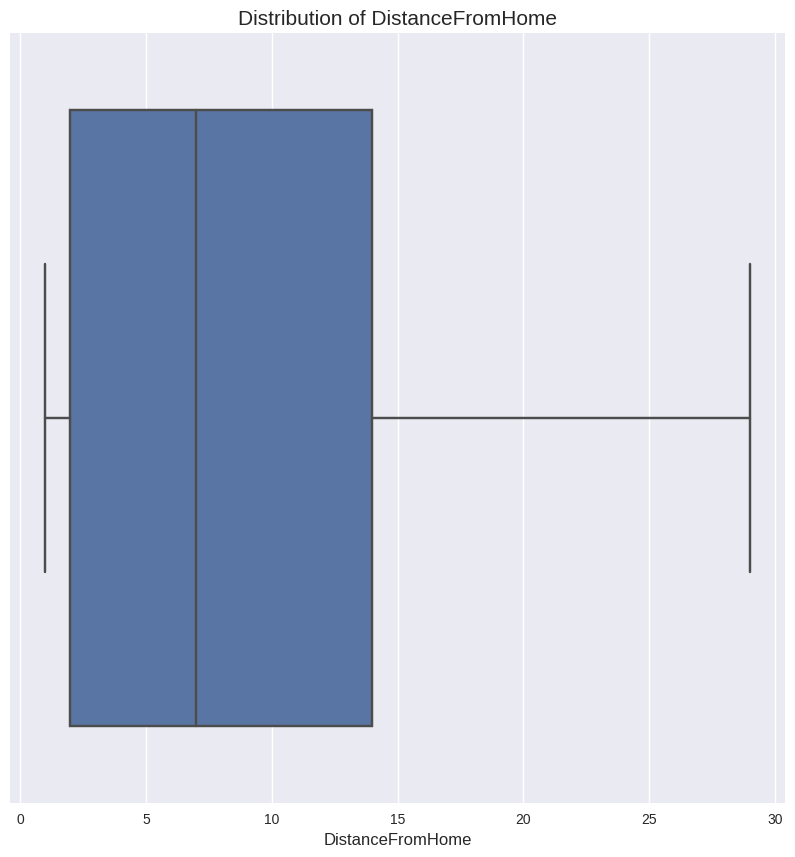

In [97]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x=employee_data['DistanceFromHome'], ax=ax)
ax.set_title('Distribution of DistanceFromHome', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize=12)
# Show plot
plt.show()

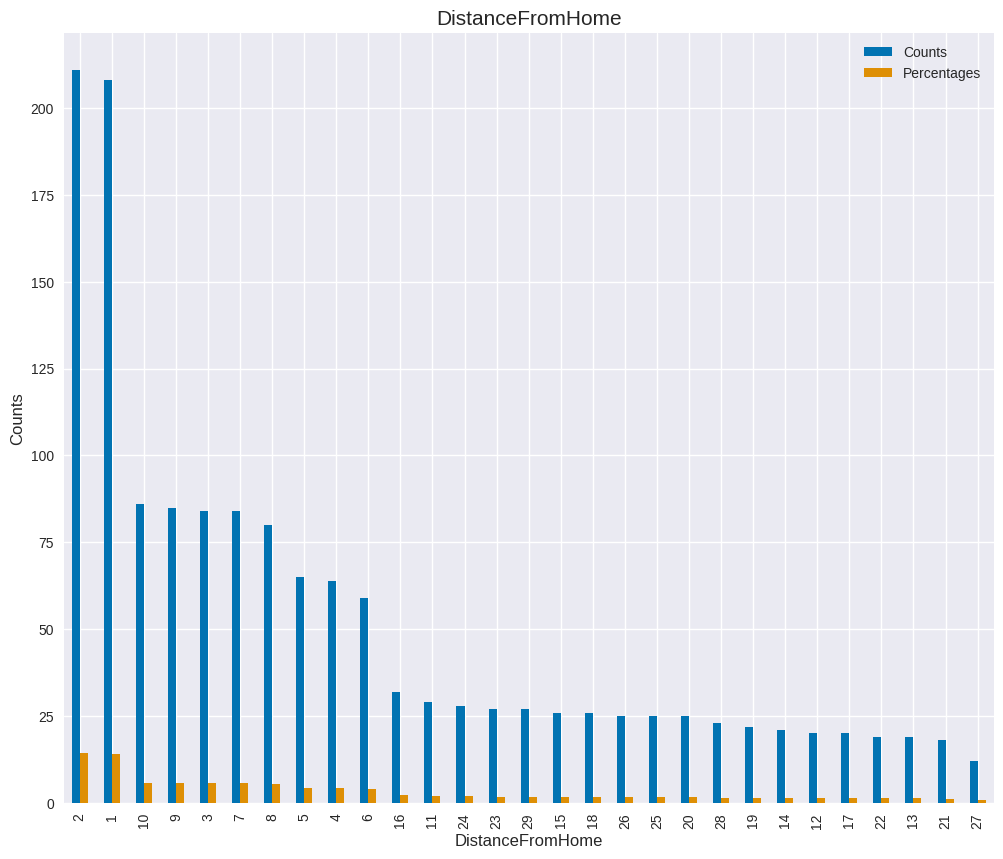

In [98]:
DistanceFromHome_data.plot(kind='bar', figsize=(12,10),color=colors)
# setting the chart title and axis labels
plt.title('DistanceFromHome', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize=12)
plt.ylabel('Counts',fontsize=12)

# show the chart
plt.show()

In [99]:
# creating a new DataFrame with the Gender counts and percentages
Gender_data = pd.DataFrame({'Counts': employee_data['Gender'].value_counts(), 'Percentages': employee_data["Gender"].value_counts()/len(employee_data) * 100})
print(Gender_data.to_string(formatters={'Percentages': '{:.2f}%'.format}))

        Counts Percentages
Male       882      60.00%
Female     588      40.00%


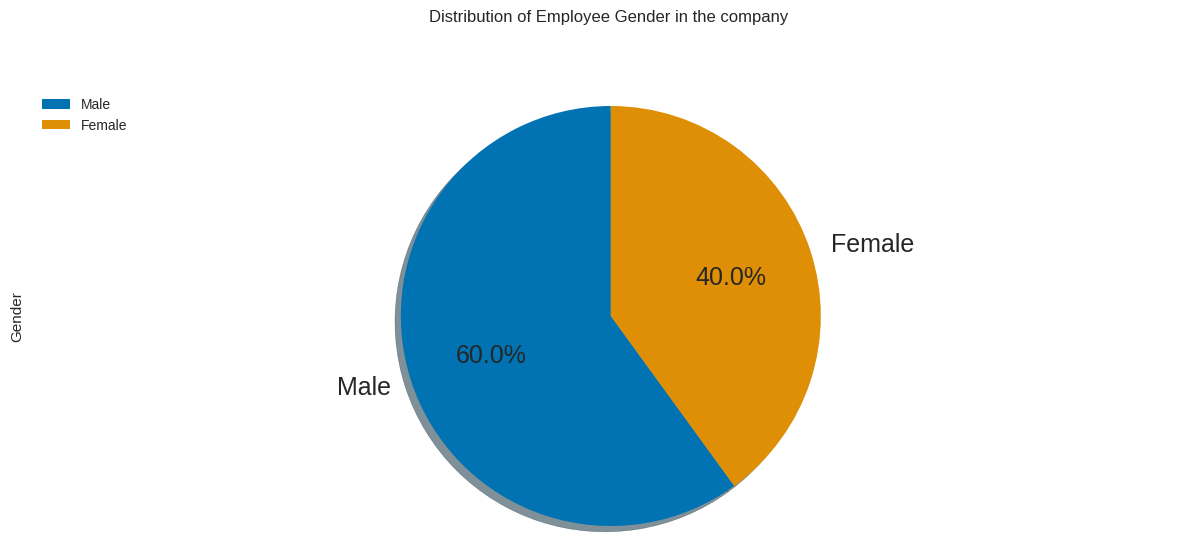

In [100]:
labels = 'Male', 'Female'
employee_data['Gender'].astype(str).value_counts().plot(kind='pie',figsize = (15,6), fontsize=18, autopct= '%1.1f%%', startangle= 90, shadow = True, labels = labels,colors=colors)
plt.title('Distribution of Employee Gender in the company ', y=1.12)
plt.axis('equal')
plt.legend(labels=labels, loc='upper left')
plt.show()

In [101]:
# creating a new DataFrame with the TotalWorkingYears counts and percentages
TotalWorkingYears_data = pd.DataFrame({'Counts': employee_data['TotalWorkingYears'].value_counts(), 'Percentages': employee_data["TotalWorkingYears"].value_counts()/len(employee_data) * 100})
print(TotalWorkingYears_data.to_string(formatters={'Percentages': '{:.2f}%'.format}))

    Counts Percentages
10     202      13.74%
6      125       8.50%
8      103       7.01%
9       96       6.53%
5       88       5.99%
7       81       5.51%
1       81       5.51%
4       63       4.29%
12      48       3.27%
3       42       2.86%
15      40       2.72%
16      37       2.52%
11      36       2.45%
13      36       2.45%
21      34       2.31%
17      33       2.24%
2       31       2.11%
14      31       2.11%
20      30       2.04%
18      27       1.84%
19      22       1.50%
23      22       1.50%
22      21       1.43%
24      18       1.22%
25      14       0.95%
28      14       0.95%
26      14       0.95%
0       11       0.75%
29      10       0.68%
31       9       0.61%
32       9       0.61%
30       7       0.48%
33       7       0.48%
27       7       0.48%
36       6       0.41%
34       5       0.34%
37       4       0.27%
35       3       0.20%
40       2       0.14%
38       1       0.07%


In [102]:
employee_data.TotalWorkingYears.describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

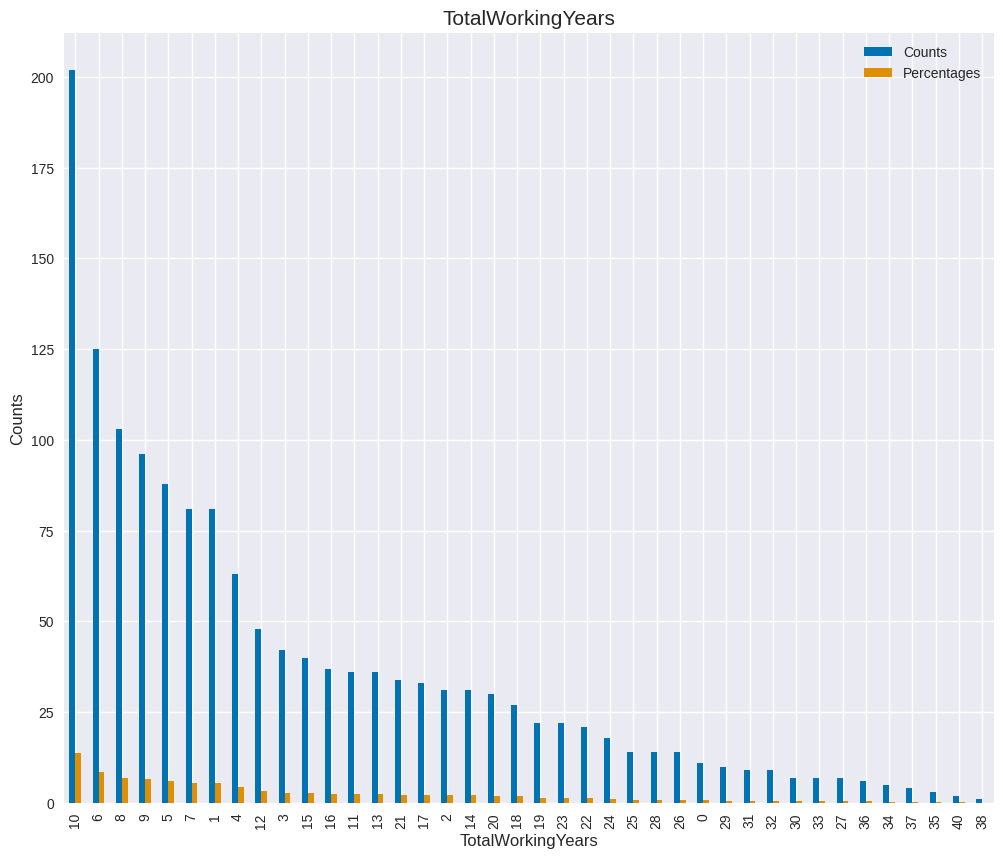

In [103]:
TotalWorkingYears_data.plot(kind='bar', figsize=(12,10),color=colors)
# setting the chart title and axis labels
plt.title('TotalWorkingYears', fontsize=15)
plt.xlabel('TotalWorkingYears', fontsize=12)
plt.ylabel('Counts',fontsize=12)

# show the chart
plt.show()

In [104]:
employee_data.TotalWorkingYears.describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [105]:
# creating a new DataFrame with the YearsAtCompany counts and percentages
YearsAtCompany_data = pd.DataFrame({'Counts': employee_data['YearsAtCompany'].value_counts(), 'Percentages': employee_data["YearsAtCompany"].value_counts()/len(employee_data) * 100})
print(YearsAtCompany_data.to_string(formatters={'Percentages': '{:.2f}%'.format}))

    Counts Percentages
5      196      13.33%
1      171      11.63%
3      128       8.71%
2      127       8.64%
10     120       8.16%
4      110       7.48%
7       90       6.12%
9       82       5.58%
8       80       5.44%
6       76       5.17%
0       44       2.99%
11      32       2.18%
20      27       1.84%
13      24       1.63%
15      20       1.36%
14      18       1.22%
22      15       1.02%
12      14       0.95%
21      14       0.95%
18      13       0.88%
16      12       0.82%
19      11       0.75%
17       9       0.61%
24       6       0.41%
33       5       0.34%
25       4       0.27%
26       4       0.27%
31       3       0.20%
32       3       0.20%
27       2       0.14%
36       2       0.14%
29       2       0.14%
23       2       0.14%
37       1       0.07%
40       1       0.07%
34       1       0.07%
30       1       0.07%


In [106]:
employee_data.YearsAtCompany.describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

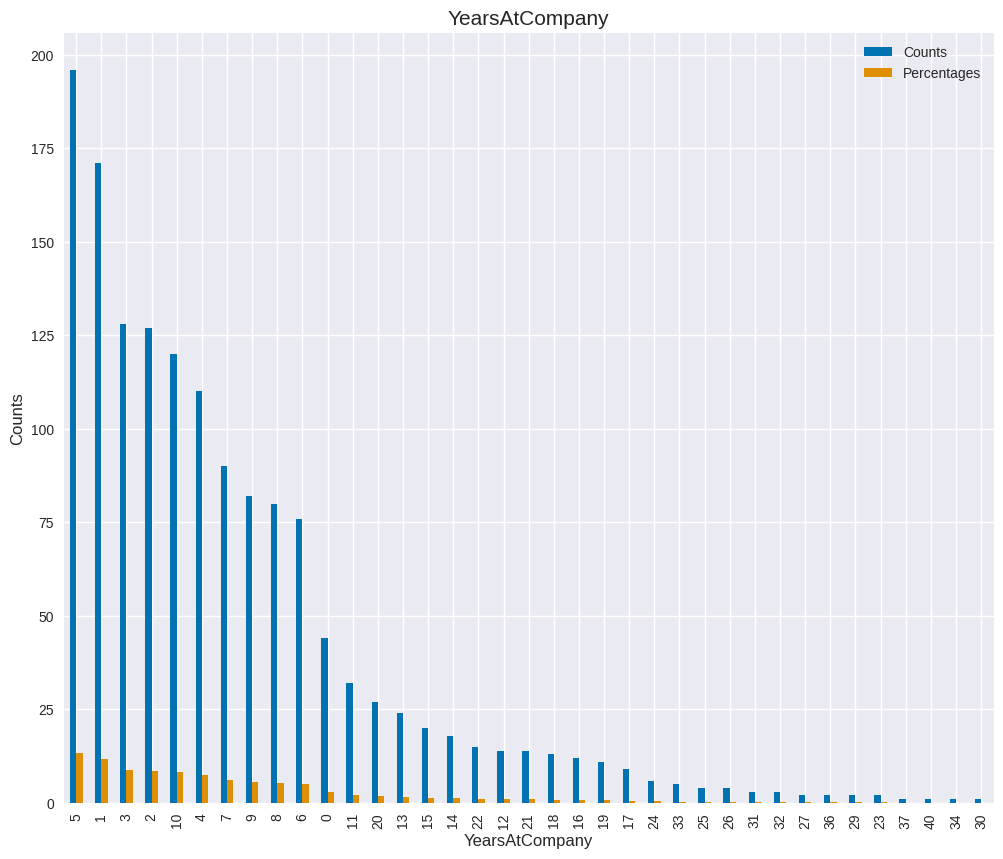

In [107]:
YearsAtCompany_data.plot(kind='bar', figsize=(12,10),color=colors)
# setting the chart title and axis labels
plt.title('YearsAtCompany', fontsize=15)
plt.xlabel('YearsAtCompany', fontsize=12)
plt.ylabel('Counts',fontsize=12)

# show the chart
plt.show()

In [108]:
# creating a new DataFrame with the YearsInCurrentRole counts and percentages
YearsInCurrentRole_data = pd.DataFrame({'Counts': employee_data['YearsInCurrentRole'].value_counts(), 'Percentages': employee_data["YearsInCurrentRole"].value_counts()/len(employee_data) * 100})
print(YearsInCurrentRole_data.to_string(formatters={'Percentages': '{:.2f}%'.format}))

    Counts Percentages
2      372      25.31%
0      244      16.60%
7      222      15.10%
3      135       9.18%
4      104       7.07%
8       89       6.05%
9       67       4.56%
1       57       3.88%
6       37       2.52%
5       36       2.45%
10      29       1.97%
11      22       1.50%
13      14       0.95%
14      11       0.75%
12      10       0.68%
15       8       0.54%
16       7       0.48%
17       4       0.27%
18       2       0.14%


In [109]:
employee_data.YearsInCurrentRole.describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

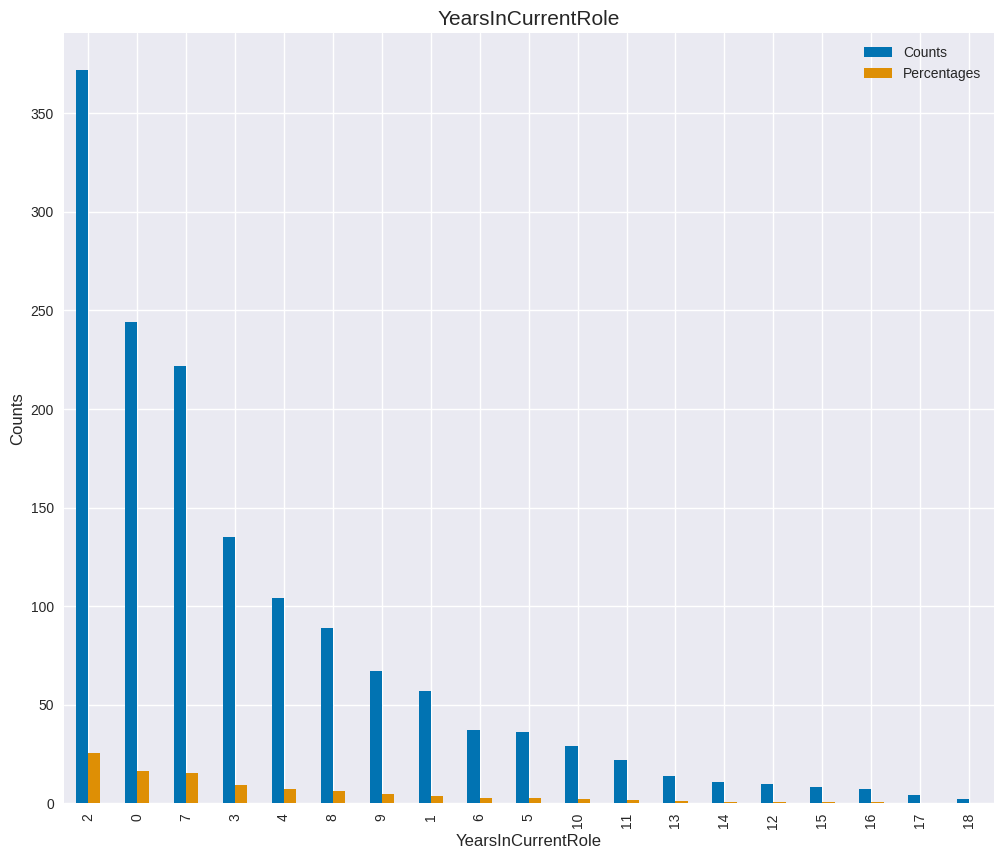

In [110]:
YearsInCurrentRole_data.plot(kind='bar', figsize=(12,10),color=colors)
# setting the chart title and axis labels
plt.title('YearsInCurrentRole', fontsize=15)
plt.xlabel('YearsInCurrentRole', fontsize=12)
plt.ylabel('Counts',fontsize=12)

# show the chart
plt.show()

In [111]:
# creating a new DataFrame with the YearsSinceLastPromotion counts and percentages
YearsSinceLastPromotion_data = pd.DataFrame({'Counts': employee_data['YearsSinceLastPromotion'].value_counts(), 'Percentages': employee_data["YearsSinceLastPromotion"].value_counts()/len(employee_data) * 100})
print(YearsSinceLastPromotion_data.to_string(formatters={'Percentages': '{:.2f}%'.format}))

    Counts Percentages
0      581      39.52%
1      357      24.29%
2      159      10.82%
7       76       5.17%
4       61       4.15%
3       52       3.54%
5       45       3.06%
6       32       2.18%
11      24       1.63%
8       18       1.22%
9       17       1.16%
15      13       0.88%
13      10       0.68%
12      10       0.68%
14       9       0.61%
10       6       0.41%


In [112]:
employee_data.YearsSinceLastPromotion.describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

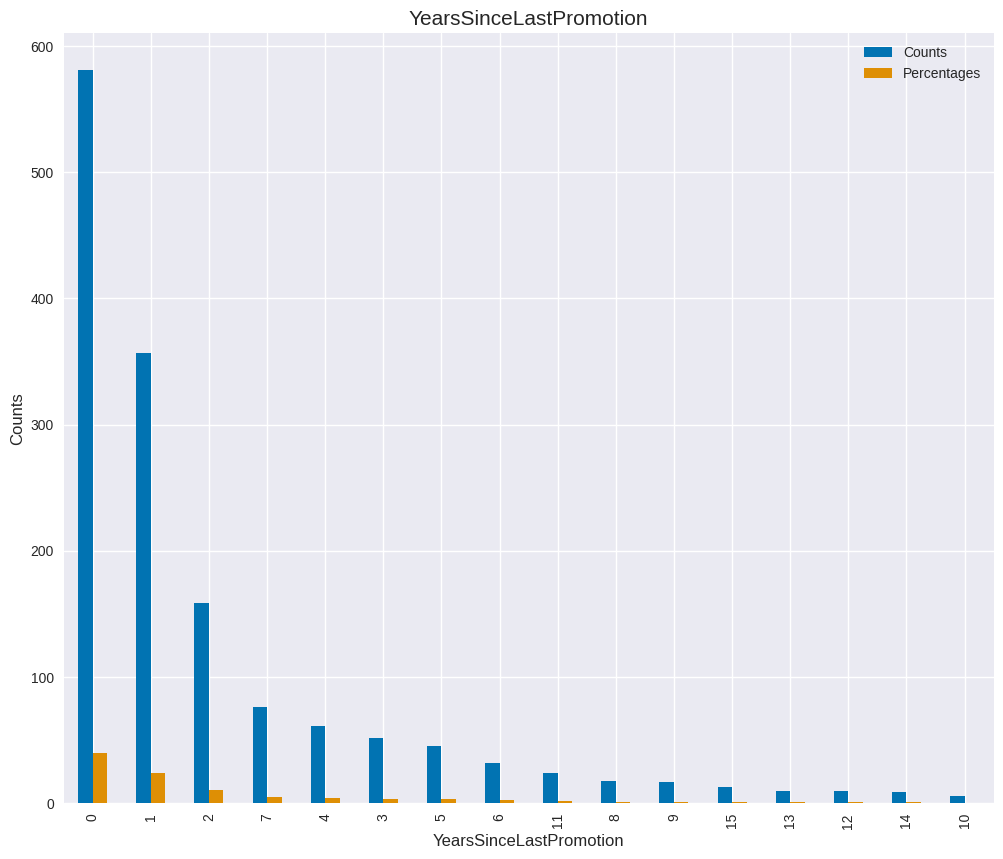

In [113]:
YearsSinceLastPromotion_data.plot(kind='bar', figsize=(12,10),color=colors)
# setting the chart title and axis labels
plt.title('YearsSinceLastPromotion', fontsize=15)
plt.xlabel('YearsSinceLastPromotion', fontsize=12)
plt.ylabel('Counts',fontsize=12)

# show the chart
plt.show()

In [114]:
#Area Under ROC Curve

auc_score_test = metrics.roc_auc_score(tree_test_pred.actual_left,tree_test_pred.predicted_left)
print("AUROC Score:",round(auc_score_test,4))

AUROC Score: 0.8375


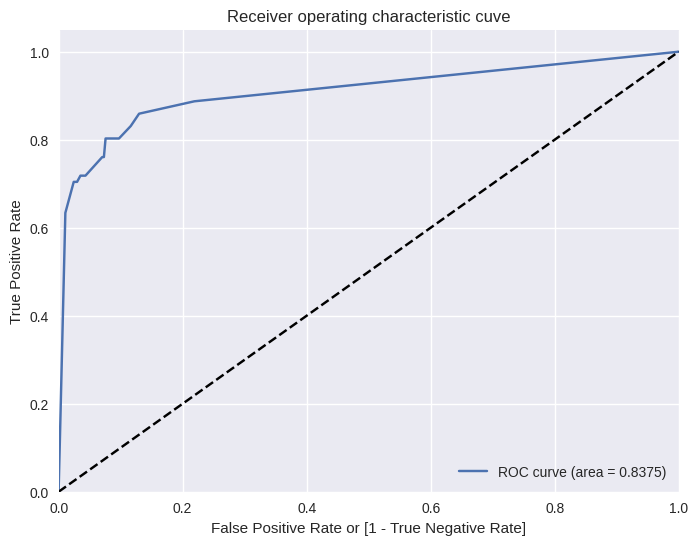

In [115]:
##Plotting the ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(tree_test_pred.actual_left, tree_test_pred.predicted_prob,drop_intermediate=False)


plt.figure(figsize=(8, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic cuve')
plt.legend(loc="lower right")
plt.show()

In [116]:
#calculating the recall score

print("Recall Score:",round(metrics.recall_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))

Recall Score: 71.831


In [117]:
#calculating the precision score

print("Precision Score:",round(metrics.precision_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))

Precision Score: 76.119


In [118]:
print(metrics.classification_report(tree_test_pred.actual_left,tree_test_pred.predicted_left))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       370
           1       0.76      0.72      0.74        71

    accuracy                           0.92       441
   macro avg       0.85      0.84      0.85       441
weighted avg       0.92      0.92      0.92       441

